# 1. Business Problem

### 1.1. Description

<p>Source: https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/</p>

<p> Data: The data for this comeptition comes from the Taarifa waterpoints dashboard, which aggregates data from the Tanzania Ministry of Water.</p>

<p> Download training set values and Training set labels from https://www.drivendata.org/.</p>

<h6> Problem statement : </h6>
<p> Goal is to predict the operating condition of a waterpoint for each record in the dataset. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

### https://sci-hub.se/https:/ieeexplore.ieee.org/abstract/document/7872890/metrics#metrics

<h1>2. Machine Learning Problem Formulation</h1>

<h3>2.1.1. Data Overview</h3>

# The features in this dataset

amount_tsh - Total static head (amount water available to waterpoint)

date_recorded - The date the row was entered

funder - Who funded the well

gps_height - Altitude of the well

installer - Organization that installed the well

longitude - GPS coordinate

latitude - GPS coordinate

wpt_name - Name of the waterpoint if there is one

num_private -

basin - Geographic water basin

subvillage - Geographic location

region - Geographic location

region_code - Geographic location (coded)

district_code - Geographic location (coded)

lga - Geographic location

ward - Geographic location

population - Population around the well

public_meeting - True/False

recorded_by - Group entering this row of data

scheme_management - Who operates the waterpoint

scheme_name - Who operates the waterpoint

permit - If the waterpoint is permitted

construction_year - Year the waterpoint was 

extraction_type - The kind of extraction the waterpoint uses

extraction_type_group - The kind of extraction the waterpoint uses

extraction_type_class - The kind of extraction the waterpoint uses

management - How the waterpoint is managed

management_group - How the waterpoint is managed

payment - What the water costs

payment_type - What the water costs

water_quality - The quality of the water

quality_group - The quality of the water

quantity - The quantity of water

quantity_group - The quantity of water

source - The source of the water

source_type - The source of the water

source_class - The source of the water

waterpoint_type - The kind of waterpoint

waterpoint_type_group - The kind of waterpoin

# The labels in this dataset

Distribution of Labels
The labels in this dataset are simple. There are three possible values:

functional - the waterpoint is operational and there are no repairs needed

functional needs repair - the waterpoint is operational, but needs repairs

non functional - the waterpoint is not operational

In [1]:
#!pip install dython

In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 23.3 MB/s 
     |████████████████████████████████| 6.3 MB 44.4 MB/s 
     |████████████████████████████████| 16.7 MB 48.8 MB/s 


#Data decription

In [3]:
import pandas as pd
df_train_label=pd.read_csv('/content/drive/MyDrive/self case study 1/train labels.csv')
df_train_var=pd.read_csv('/content/drive/MyDrive/self case study 1/train variables.csv')

In [4]:
df=df_train_var.merge(df_train_label)

In [5]:
df

id  amount_tsh date_recorded           funder  gps_height  \
0      69572      6000.0    2011-03-14            Roman        1390   
1       8776         0.0    2013-03-06          Grumeti        1399   
2      34310        25.0    2013-02-25     Lottery Club         686   
3      67743         0.0    2013-01-28           Unicef         263   
4      19728         0.0    2011-07-13      Action In A           0   
...      ...         ...           ...              ...         ...   
59395  60739        10.0    2013-05-03  Germany Republi        1210   
59396  27263      4700.0    2011-05-07      Cefa-njombe        1212   
59397  37057         0.0    2011-04-11              NaN           0   
59398  31282         0.0    2011-03-08            Malec           0   
59399  26348         0.0    2011-03-23       World Bank         191   

          installer  longitude   latitude              wpt_name  num_private  \
0             Roman  34.938093  -9.856322                  none            0   
1           GRUMETI  34.698766  -2.147466              Zahanati            0   
2      World vision  37.460664  -3.821329           Kwa Mahundi            0   
3            UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4           Artisan  31.130847  -1.825359               Shuleni            0   
...             ...        ...        ...                   ...          ...   
59395           CES  37.169807  -3.253847   Area Three Namba 27            0   
59396          Cefa  35.249991  -9.070629     Kwa Yahona Kuvala            0   
59397           NaN  34.017087  -8.750434               Mashine            0   
59398          Musa  35.861315  -6.378573                Mshoro            0   
59399         World  38.104048  -6.747464       Kwa Mzee Lugawa            0   

       ... water_quality quality_group      quantity  quantity_group  \
0      ...          soft          good        enough          enough   
1      ...          soft          good  insufficient    insufficient   
2      ...          soft          good        enough          enough   
3      ...          soft          good           dry             dry   
4      ...          soft          good      seasonal        seasonal   
...    ...           ...           ...           ...             ...   
59395  ...          soft          good        enough          enough   
59396  ...          soft          good        enough          enough   
59397  ...      fluoride      fluoride        enough          enough   
59398  ...          soft          good  insufficient    insufficient   
59399  ...         salty         salty        enough          enough   

                     source           source_type source_class  \
0                    spring                spring  groundwater   
1      rainwater harvesting  rainwater harvesting      surface   
2                       dam                   dam      surface   
3               machine dbh              borehole  groundwater   
4      rainwater harvesting  rainwater harvesting      surface   
...                     ...                   ...          ...   
59395                spring                spring  groundwater   
59396                 river            river/lake      surface   
59397           machine dbh              borehole  groundwater   
59398          shallow well          shallow well  groundwater   
59399          shallow well          shallow well  groundwater   

                   waterpoint_type waterpoint_type_group    status_group  
0               communal standpipe    communal standpipe      functional  
1               communal standpipe    communal standpipe      functional  
2      communal standpipe multiple    communal standpipe      functional  
3      communal standpipe multiple    communal standpipe  non functional  
4               communal standpipe    communal standpipe      functional  
...                            ...                   ...             ...  
59395        

Data contains 59400 rows and 41 columns

In [6]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [7]:
df.info() #amount_tshgps_heightlongitudelatitudenum_privateregion_codedistrict_codepopulation 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [8]:
df.describe()

id     amount_tsh    gps_height     longitude      latitude  \
count  59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
mean   37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
std    21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
min        0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
50%    37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
75%    55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
max    74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  59400.000000  59400.000000   59400.000000  59400.000000   
mean       0.474141     15.297003       5.629747    179.909983   
std       12.236230     17.587406       9.633649    471.482176   
min        0.000000      1.000000       0.000000      0.000000   
25%        0.000000      5.000000       2.000000      0.000000   
50%        0.000000     12.000000       3.000000     25.000000   
75%        0.000000     17.000000       5.000000    215.000000   
max     1776.000000     99.000000      80.000000  30500.000000   

       construction_year  
count       59400.000000  
mean         1300.652475  
std           951.620547  
min             0.000000  
25%             0.000000  
50%          1986.000000  
75%          2004.000000  
max          2013.000000

In [9]:
#amount_tsh - Total static head (amount water available to waterpoint)

# stacked bar chart

In [10]:
#https://towardsdatascience.com/100-stacked-charts-in-python-6ca3e1962d2b
def plot_stacked_bars(dataframe, title_, size_=(10, 6), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(['functional','functional needs repair','non functional'], loc=legend_)
    # Labels
    plt.ylabel("status_group (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

In [11]:
#https://towardsdatascience.com/100-stacked-charts-in-python-6ca3e1962d2b
#https://matplotlib.org/stable/tutorials/colors/colormaps.html
def new_stack_bar(feature):
  'cross tabulation that shows the proportion of the type of status vs feature.'
  cross_tab = pd.crosstab(index=df[feature],columns=df['status_group'])

  cross_tab_prop = pd.crosstab(index=df[feature],columns=df['status_group'],normalize="index")
  "normalize=True argument gives us the index-wise proportion of the data."

  cross_tab_prop[:10].sort_values(by=['functional'], ascending=[False])


  cross_tab_prop[:10].plot(kind='bar', stacked=True,colormap='Dark2', 
                    figsize=(10, 6))

  plt.legend(loc="lower right", ncol=2)

  plt.xlabel(feature)
  plt.ylabel("Proportion")

  #first loop iterates through the index of the cross tabulation having the proportions. 
  #The second loop iterates through the values by each index.
  for n, x in enumerate([*cross_tab[:10].index.values]):
      for (proportion, y_loc) in zip(cross_tab_prop[:10].loc[x],
                                   cross_tab_prop[:10].loc[x].cumsum()):
                
          plt.text(x=n - 0.17,
                   y=y_loc,
                   s=f'{np.round(proportion * 100, 1)}%', 
                   color="black",
                   fontsize=12,
                  )

  plt.title(str(feature)+ ' vs status_group')
  plt.show()

#1.1amount_tsh - Total static head

In [12]:
df.amount_tsh.describe()

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

In [13]:
sum(pd.isnull(df['amount_tsh']))


0

In [14]:
df.amount_tsh.value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: amount_tsh, Length: 98, dtype: int64

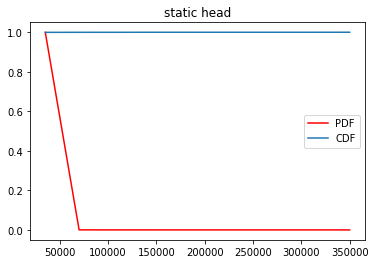

In [15]:
#https://www.geeksforgeeks.org/how-to-calculate-and-plot-a-cumulative-distribution-function-with-matplotlib-in-python/
# defining the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# initializing random values
data = df['amount_tsh']

# getting data of the histogram
count, bins_count = np.histogram(data, bins=10)

# finding the PDF of the histogram using count values
pdf = count / sum(count)

# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)

# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.title('static head')
plt.legend()


In [16]:
for i in range(10):
  print(str(i*10)+'percentile',np.percentile(df['amount_tsh'],i*10))

0percentile 0.0
10percentile 0.0
20percentile 0.0
30percentile 0.0
40percentile 0.0
50percentile 0.0
60percentile 0.0
70percentile 0.0
80percentile 50.0
90percentile 500.0


In [17]:
for i in range(91,100):
  print(str(i)+'percentile',np.percentile(df['amount_tsh'],i))

91percentile 500.0
92percentile 500.0
93percentile 1000.0
94percentile 1000.0
95percentile 1200.0
96percentile 2000.0
97percentile 2200.0
98percentile 3000.0
99percentile 5000.0


99 percentile values are having static head less than 5000

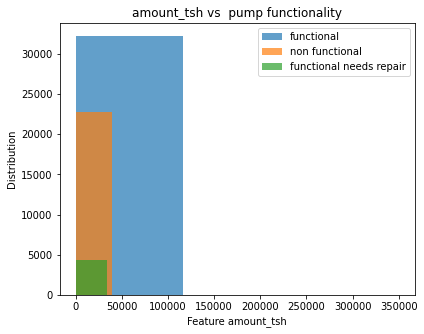

From the below plot if the tsh head >40000 then we can clearly says pumps are functional
From the below plot if the tsh head <40000 then class labels are overlapping
from the plot tsh is useful in seperating the class label 


In [18]:
#https://datascience.stackexchange.com/questions/31752/plot-show-relationship-between-independent-variable-and-dependent-variablebinar
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(df['amount_tsh'][df['status_group'] == 'functional'], bins=3, alpha = 0.7, label = 'functional')
plt.hist(df['amount_tsh'][df['status_group'] == 'non functional'], bins=3, alpha = 0.7, label = 'non functional')
plt.hist(df['amount_tsh'][df['status_group'] == 'functional needs repair'], bins=3, alpha = 0.7, label = 'functional needs repair')

plt.title('amount_tsh vs  pump functionality')
plt.ylabel('Distribution')
plt.xlabel('Feature amount_tsh')
plt.legend()
plt.show()
print('From the below plot if the tsh head >40000 then we can clearly says pumps are functional')
print('From the below plot if the tsh head <40000 then class labels are overlapping')
print('from the plot tsh is useful in seperating the class label ')

From the above plot if the tsh head >40000 then we can clearly says pumps are functional

From the above plot if the tsh head <40000 then class labels are overlapping

From the above plot tsh is useful in seperating the class label 

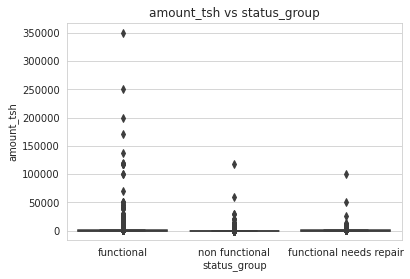

box plot does not make any sense because all class labels are overlapping


In [19]:
#https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/
# Draw a vertical boxplot grouped
# by a categorical variable:
import seaborn as sns
sns.set_style("whitegrid")

sns.boxplot(y = df['amount_tsh'], x =df['status_group'] , data = df)
plt.title('amount_tsh vs status_group')
plt.show()
print('box plot does not make any sense because all class labels are overlapping')

From the box plot if amount_tsh<13000 class labels are overlapping and amount_tsh>13000 we can clearly says that pump is functional

so it is clearly evident that amount_tsh is useful in predicting the class label

In [20]:
df.amount_tsh.value_counts()[0]

41639

In [21]:
s = sum(df.amount_tsh.value_counts().values)# total count
h = df.amount_tsh.value_counts().values/s #percentage

In [22]:
#dict={}
#for i,j in zip(df.amount_tsh.value_counts().index,df.amount_tsh.value_counts()/s):
#  dict[i]=j

In [23]:
#dict[0]

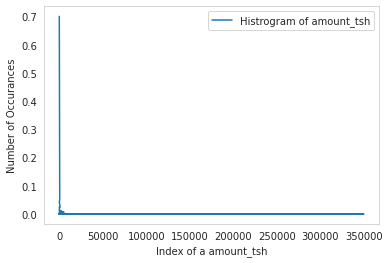

In [24]:
#https://colab.research.google.com/drive/1GeXzonFifd9Ub0Dcz7wycGUpe5VuXZgb
import matplotlib.pyplot as plt
x=df.amount_tsh.value_counts().index
s = sum(df.amount_tsh.value_counts().values);
h = df.amount_tsh.value_counts().values/s;
plt.plot(x,h, label="Histrogram of amount_tsh")
plt.xlabel('Index of a amount_tsh')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

70% values of static head are less than or equal to zero

#1.2 date recordeed

In [25]:
sum(pd.isnull(df.date_recorded))

0

In [26]:
df.date_recorded.value_counts()

2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2011-09-11      1
2011-08-31      1
2011-09-21      1
2011-08-30      1
2013-12-01      1
Name: date_recorded, Length: 356, dtype: int64

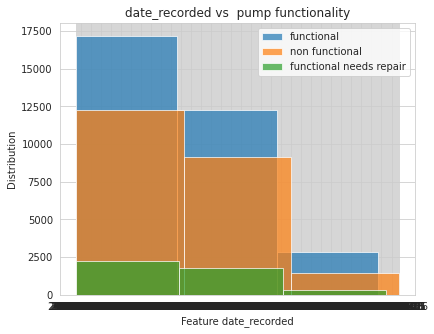

From the below plot it is hard to differentiate pumps functionality


In [27]:
#https://datascience.stackexchange.com/questions/31752/plot-show-relationship-between-independent-variable-and-dependent-variablebinar
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(df['date_recorded'][df['status_group'] == 'functional'], bins=3, alpha = 0.7, label = 'functional')
plt.hist(df['date_recorded'][df['status_group'] == 'non functional'], bins=3, alpha = 0.7, label = 'non functional')
plt.hist(df['date_recorded'][df['status_group'] == 'functional needs repair'], bins=3, alpha = 0.7, label = 'functional needs repair')

plt.title('date_recorded vs  pump functionality')
plt.ylabel('Distribution')
plt.xlabel('Feature date_recorded')
plt.legend()
plt.show()
print('From the below plot it is hard to differentiate pumps functionality')


From the below plot it is hard to differentiate pumps functionality by using date feature since they are equiprobable of each class label

In [28]:
df['date_recorded'] = pd.to_datetime(df['date_recorded'])

In [29]:
df['date_recorded'].value_counts()

2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2011-09-11      1
2011-08-31      1
2011-09-21      1
2011-08-30      1
2013-12-01      1
Name: date_recorded, Length: 356, dtype: int64

#1.3 funder
 Who funded the well

In [30]:
df.funder

0                  Roman
1                Grumeti
2           Lottery Club
3                 Unicef
4            Action In A
              ...       
59395    Germany Republi
59396        Cefa-njombe
59397                NaN
59398              Malec
59399         World Bank
Name: funder, Length: 59400, dtype: object

In [31]:
z=sum(pd.isnull(df.funder))
print('number of null values',z)

number of null values 3635


In [32]:
df.funder.value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Rarymond Ekura               1
Justine Marwa                1
Municipal Council            1
Afdp                         1
Samlo                        1
Name: funder, Length: 1897, dtype: int64

Text(0.5, 1.0, 'top 20 funders')

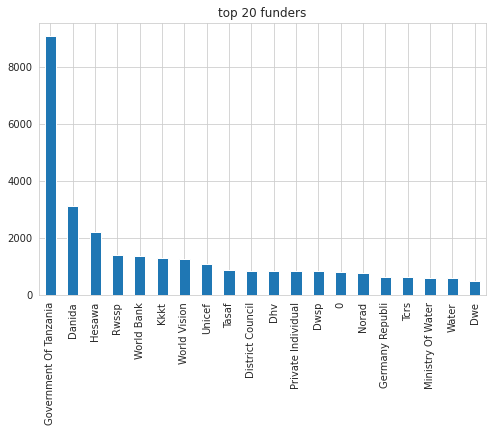

In [33]:
#https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/
top_10 = df.funder.value_counts()[:20]
top_10.plot(kind='bar',figsize=(8,5))
plt.title('top 20 funders')

from the below plots funders feature have some effect on target variable

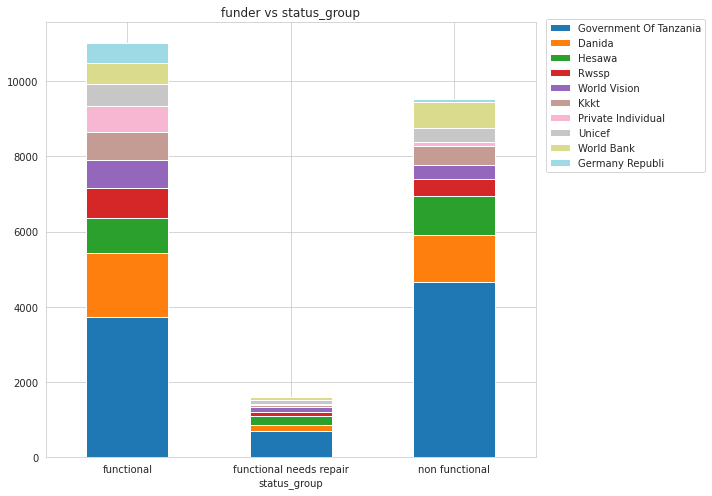

In [34]:
#https://stackoverflow.com/questions/23415500/pandas-plotting-a-stacked-bar-chart
test5 = df.groupby(['funder', 'status_group'])['funder'].count().unstack('status_group').fillna(0)

test6=test5.reset_index().sort_values(by=['functional',], ascending=False)
test6
#http://seaborn.pydata.org/tutorial/categorical.html?highlight=bar%20plot
import matplotlib.pyplot as plt
import pandas as pd

df1 = test6

ax = df1[:10].set_index('funder').T.plot.bar(stacked=True, rot=0, cmap='tab20', figsize=(10, 7))
ax.legend(bbox_to_anchor=(1.01, 1.02), loc='upper left')
plt.title('funder vs status_group')
plt.tight_layout()
plt.show()

From plot  Government of Tanzania have funding most  number of projects followed by DWA Danida and these projects having highest number of nonfunctional class labels .hence it might be a useful feture in  predicting the class label 

#1.4 gps_height (Altitude of the well)

In [35]:
df.gps_height

0        1390
1        1399
2         686
3         263
4           0
         ... 
59395    1210
59396    1212
59397       0
59398       0
59399     191
Name: gps_height, Length: 59400, dtype: int64

In [36]:
sum(pd.isnull(df.gps_height))

0

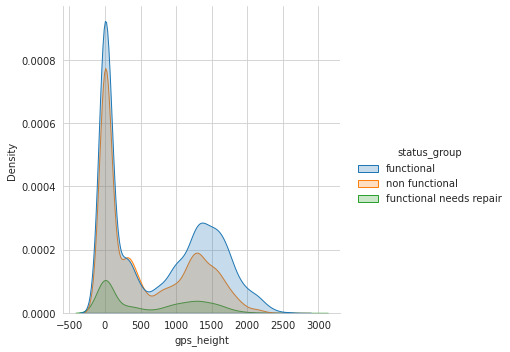

In [37]:
#https://seaborn.pydata.org/generated/seaborn.pairplot.html
import seaborn as sns
sns.displot(df, x="gps_height", hue="status_group", kind="kde", fill=True)

from the distribution plot its hard to differentiate the class label w.r.t to gps height, but we can see it follows a normal distribution

In [38]:
#heights having negative values count
z=len(df[df.gps_height<0]['gps_height'].value_counts())
print('heights having negative values count=',z)

heights having negative values count= 59


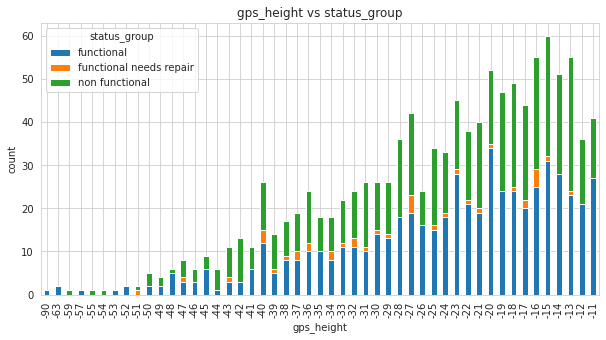

In [39]:
#https://stackoverflow.com/questions/23415500/pandas-plotting-a-stacked-bar-chart
test5 = df.groupby(['gps_height', 'status_group'])['gps_height'].count().unstack('status_group').fillna(0)

test5[0:49].plot(kind='bar', stacked=True,figsize=(10, 5))
plt.title('gps_height vs status_group')
plt.ylabel('count')
plt.show()

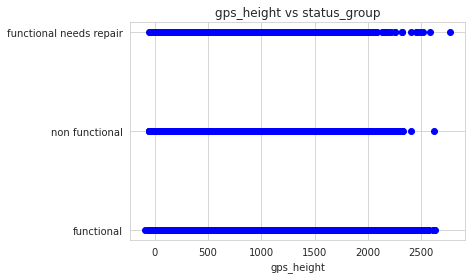

there is equal distribution of class labels for gps height


In [40]:
#https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/

import matplotlib.pyplot as plt


x =df.gps_height

y =df.status_group

plt.scatter(x, y, c ="blue")
plt.title('gps_height vs status_group')
plt.xlabel('gps_height')
# To show the plot
plt.show()
print('there is equal distribution of class labels for gps height')

From the scatter plot if the gps_height is greater than 2750 we can clearly say that pupms functional needs repair

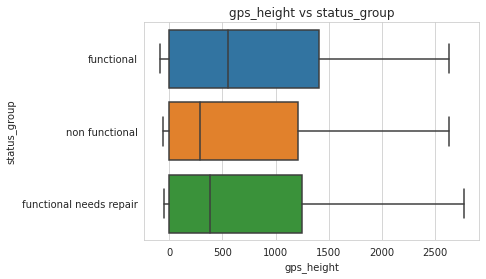

*************
beyond the range of 1250 gps height we can classify the pump as functional


In [41]:
plt.title('gps_height vs status_group')
sns.boxplot(data=df, x='gps_height', y='status_group')
plt.show()

print('*************')
print('beyond the range of 1250 gps height we can classify the pump as functional')

Beyond the range of 1250 gps height we can classify the pump as functional

Below the range of 1250 gps height feature does not help to classify the pump functionality

#1.5 installer

In [42]:
df.installer.value_counts()

DWE                17402
Government          1825
RWE                 1206
Commu               1060
DANIDA              1050
                   ...  
Wizara  ya maji        1
TWESS                  1
Nasan workers          1
R                      1
SELEPTA                1
Name: installer, Length: 2145, dtype: int64

In [43]:
z=sum(pd.isnull(df.installer))
print('number of null values',z)

#df.isnull().sum()

number of null values 3655


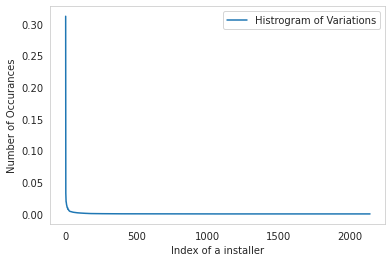

In [44]:
import matplotlib.pyplot as plt

s = sum(df.installer.value_counts().values);
h = df.installer.value_counts().values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a installer')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

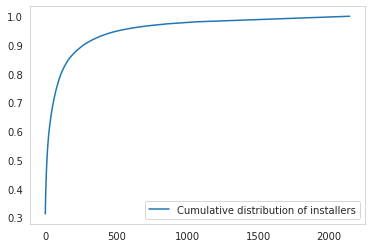

In [45]:
import numpy as np
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of installers')
plt.grid()
plt.legend()
plt.show()

 out of total 2145 installers 90 % of data contributed approximately by 250-260 installers

Text(0.5, 1.0, 'top 20 installer')

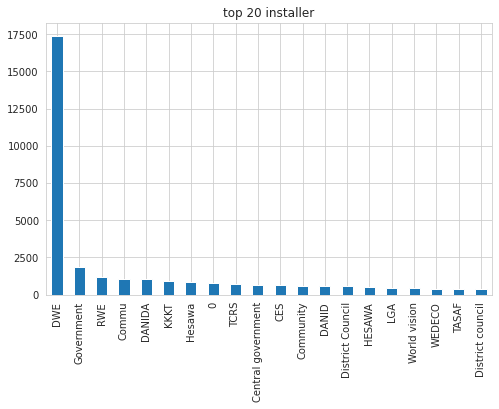

In [46]:
#https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/
top_10 = df.installer.value_counts()[:20]
top_10.plot(kind='bar',figsize=(8,5))
plt.title('top 20 installer')

Top 20 installers based on their frequency of projects

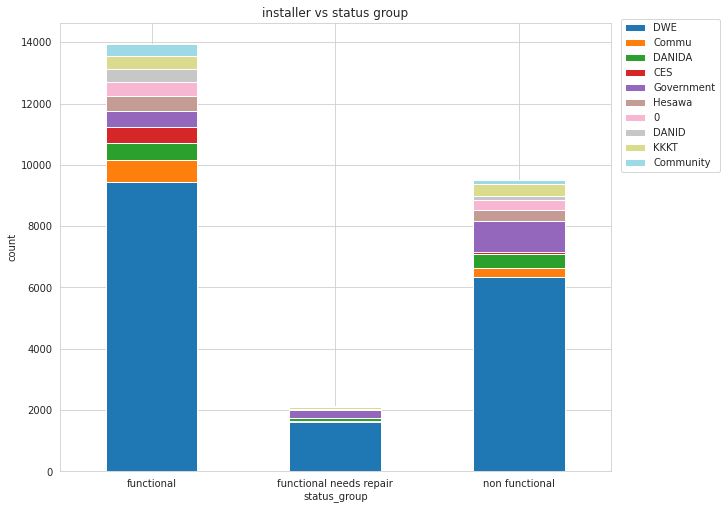

In [47]:
#https://stackoverflow.com/questions/23415500/pandas-plotting-a-stacked-bar-chart
test5 = df.groupby(['installer', 'status_group'])['installer'].count().unstack('status_group').fillna(0)

test6=test5.reset_index().sort_values(by=['functional',], ascending=False)
test6
#http://seaborn.pydata.org/tutorial/categorical.html?highlight=bar%20plot
import matplotlib.pyplot as plt
import pandas as pd

df1 = test6

ax = df1[:10].set_index('installer').T.plot.bar(stacked=True, rot=0, cmap='tab20', figsize=(10, 7))
ax.legend(bbox_to_anchor=(1.01, 1.02), loc='upper left')
plt.tight_layout()
plt.ylabel('count')
plt.title('installer vs status group')
plt.show()

From plot  DWE have installed most  number of projects  and these projects having highest number of functional class labels .hence it might be a useful feature in  predicting the class label 

# 1.6 longtitude

In [48]:
df.longitude

0        34.938093
1        34.698766
2        37.460664
3        38.486161
4        31.130847
           ...    
59395    37.169807
59396    35.249991
59397    34.017087
59398    35.861315
59399    38.104048
Name: longitude, Length: 59400, dtype: float64

In [49]:
z=sum(pd.isnull(df.longitude))
print('number of null values',z)

number of null values 0


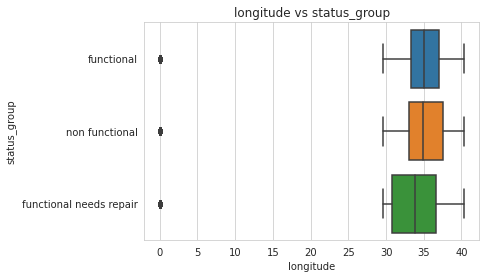

*************
with in the range of 28-32 longitude we can classify the pump as functional neeeds repair


In [50]:
plt.title('longitude vs status_group')
sns.boxplot(data=df, x='longitude', y='status_group')
plt.show()

print('*************')
print('with in the range of 28-32 longitude we can classify the pump as functional neeeds repair')

with in the range of 28-32 longitude we can classify the pump as functional neeeds repair

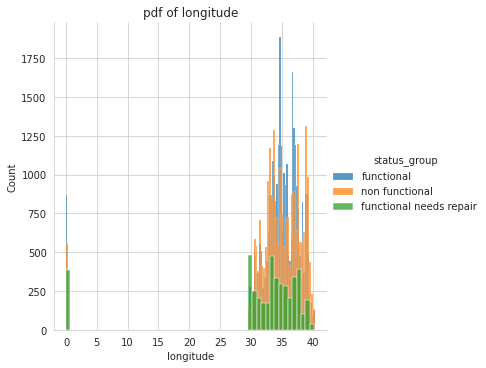

from the below plot its hard to differentiate the class label w.r.t to longitude


In [51]:
sns.FacetGrid(df, hue='status_group', height=5) \
   .map(sns.histplot, 'longitude') \
   .add_legend();
plt.title('pdf of longitude')
plt.show();
print('from the below plot its hard to differentiate the class label w.r.t to longitude')

from the below plot its hard to differentiate the class label w.r.t to longitude

# 1.7 latitude

In [52]:
df.latitude

0        -9.856322
1        -2.147466
2        -3.821329
3       -11.155298
4        -1.825359
           ...    
59395    -3.253847
59396    -9.070629
59397    -8.750434
59398    -6.378573
59399    -6.747464
Name: latitude, Length: 59400, dtype: float64

In [53]:
z=sum(pd.isnull(df.latitude))
print('number of null values',z)

number of null values 0


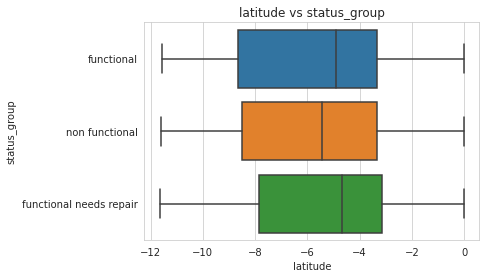

*************
 from the below plot its hard to differentiate the class label w.r.t to latitude


In [54]:
plt.title('latitude vs status_group')
sns.boxplot(data=df, x='latitude', y='status_group')
plt.show()

print('*************')
print(' from the below plot its hard to differentiate the class label w.r.t to latitude')

from the below plot its hard to differentiate the class label w.r.t to latitude but one can say if the latitude less than -8 then it does not belongs to functional needs repair

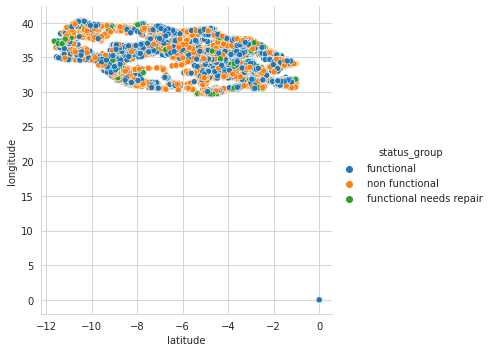

In [55]:
#https://www.geeksforgeeks.org/visualizing-relationship-between-variables-with-scatter-plots-in-seaborn/
sns.relplot(x ="latitude", y ="longitude",
			hue ="status_group", data = df);


From the plot its hard to differrntiate the class label

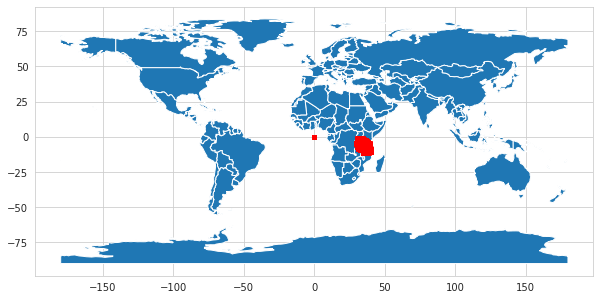

In [56]:
#https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [57]:
test5

status_group    functional  functional needs repair  non functional
installer                                                          
-                      2.0                      0.0             1.0
0                    445.0                      3.0           329.0
A.D.B                  0.0                      1.0             0.0
AAR                    0.0                      2.0             2.0
ABASIA                23.0                      2.0             4.0
...                    ...                      ...             ...
water board            0.0                      0.0             2.0
wizara ya maji         2.0                      0.0             0.0
world                  0.0                      1.0             3.0
world banks            0.0                      0.0             1.0
world vision           1.0                      0.0             0.0

[2145 rows x 3 columns]

In [58]:
#https://stackoverflow.com/questions/23415500/pandas-plotting-a-stacked-bar-chart
test5 = df.groupby(['latitude', 'longitude','status_group'])['latitude'].count().unstack('status_group').fillna(0)

#test5[0:49].plot(kind='bar', stacked=True,figsize=(10, 5))
#plt.title('lat vs long vs status group')
#plt.show()

In [59]:
test5['functional needs repair']

latitude       longitude
-1.164944e+01  37.351138      1.0
-1.164838e+01  37.351869      1.0
-1.158630e+01  37.082702      0.0
-1.156858e+01  36.463786      0.0
-1.156680e+01  36.465277      0.0
                            ...  
-9.991170e-01  31.771174      0.0
-9.990121e-01  31.415494      0.0
-9.989160e-01  31.774483      0.0
-9.984644e-01  31.417349      0.0
-2.000000e-08  0.000000     386.0
Name: functional needs repair, Length: 57520, dtype: float64

In [60]:
#https://stackoverflow.com/questions/20110170/turn-pandas-multi-index-into-column
#get index as cos by restet index option
test6=test5.reset_index() 

In [61]:
test7=test6.reset_index() 
test7

status_group  index      latitude  longitude  functional  \
0                 0 -1.164944e+01  37.351138         0.0   
1                 1 -1.164838e+01  37.351869         0.0   
2                 2 -1.158630e+01  37.082702         0.0   
3                 3 -1.156858e+01  36.463786         0.0   
4                 4 -1.156680e+01  36.465277         0.0   
...             ...           ...        ...         ...   
57515         57515 -9.991170e-01  31.771174         0.0   
57516         57516 -9.990121e-01  31.415494         1.0   
57517         57517 -9.989160e-01  31.774483         0.0   
57518         57518 -9.984644e-01  31.417349         0.0   
57519         57519 -2.000000e-08   0.000000       870.0   

status_group  functional needs repair  non functional  
0                                 1.0             0.0  
1                                 1.0             0.0  
2                                 0.0             1.0  
3                                 0.0             1.0  
4                                 0.0             1.0  
...                               ...             ...  
57515                             0.0             1.0  
57516                             0.0             0.0  
57517                             0.0             1.0  
57518                             0.0             1.0  
57519                           386.0           556.0  

[57520 rows x 6 columns]

In [62]:
#https://www.kdnuggets.com/2020/09/geographical-plots-python.html
import plotly.express as px
fig = px.density_mapbox(test7, lat='latitude', lon='longitude', z='functional', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

Above plot shows the pump functionality at various locations 
if you place the mouse on location which shows pump functionality at various latitudes and longitudes

In [63]:
#https://www.kdnuggets.com/2020/09/geographical-plots-python.html
fig = px.density_mapbox(test7, lat='latitude', lon='longitude', z='functional needs repair', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

In [64]:
#https://www.kdnuggets.com/2020/09/geographical-plots-python.html

fig = px.density_mapbox(test7, lat='latitude', lon='longitude', z='non functional', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

Above plots shows that pump functionality at various locations by using latitude and longitude variables

# 1.8  wpt_name 

Name of the waterpoint 


In [65]:
z=sum(pd.isnull(df.wpt_name))
print('number of null values',z)

number of null values 0


In [66]:
df.wpt_name

0                        none
1                    Zahanati
2                 Kwa Mahundi
3        Zahanati Ya Nanyumbu
4                     Shuleni
                 ...         
59395     Area Three Namba 27
59396       Kwa Yahona Kuvala
59397                 Mashine
59398                  Mshoro
59399         Kwa Mzee Lugawa
Name: wpt_name, Length: 59400, dtype: object

In [67]:
df.wpt_name.value_counts()

none                       3563
Shuleni                    1748
Zahanati                    830
Msikitini                   535
Kanisani                    323
                           ... 
Kwa Medadi                    1
Kwa Kubembeni                 1
Shule Ya Msingi Milanzi       1
Funua                         1
Kwa Mzee Lugawa               1
Name: wpt_name, Length: 37400, dtype: int64

Text(0.5, 1.0, 'wpt_name vs status_group')

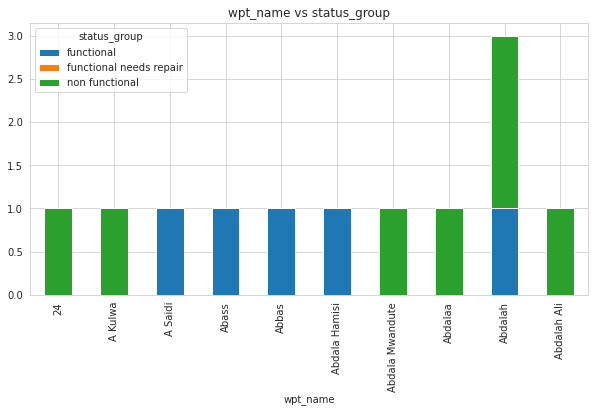

In [68]:
#https://stackoverflow.com/questions/23415500/pandas-plotting-a-stacked-bar-chart
test5 = df.groupby(['wpt_name', 'status_group'])['status_group'].count().unstack('status_group').fillna(0)

test5[0:10].plot(kind='bar', stacked=True,figsize=(10, 5))
plt.title('wpt_name vs status_group')

Water point names individually gives how many of them are belonging to each class hence it might be usful in predicting the target variable

In [69]:
test5

status_group       functional  functional needs repair  non functional
wpt_name                                                              
24                        0.0                      0.0             1.0
A Kulwa                   0.0                      0.0             1.0
A Saidi                   1.0                      0.0             0.0
Abass                     1.0                      0.0             0.0
Abbas                     1.0                      0.0             0.0
...                       ...                      ...             ...
Zungu                     1.0                      0.0             0.0
Zunguni                   0.0                      0.0             1.0
Zunzuli A Shuleni         0.0                      0.0             1.0
Zuwena Kindo              0.0                      0.0             1.0
none                   2630.0                     76.0           857.0

[37400 rows x 3 columns]

In [70]:
test6=test5.reset_index().sort_values(by=['functional',], ascending=False)

In [71]:
test6

status_group             wpt_name  functional  functional needs repair  \
37399                        none      2630.0                     76.0   
35529                     Shuleni       859.0                    143.0   
37195                    Zahanati       430.0                     78.0   
29743                   Msikitini       263.0                     44.0   
1066                      Bombani       158.0                     21.0   
...                           ...         ...                      ...   
8735                    Kwa Bunga         0.0                      0.0   
23102                   Kwa Sitta         0.0                      0.0   
23101                  Kwa Sitila         0.0                      0.0   
23096         Kwa Sister Kalebela         0.0                      0.0   
0                              24         0.0                      0.0   

status_group  non functional  
37399                  857.0  
35529                  746.0  
37195                  322.0  
29743                  228.0  
1066                    92.0  
...                      ...  
8735                     2.0  
23102                    1.0  
23101                    1.0  
23096                    1.0  
0                        1.0  

[37400 rows x 4 columns]

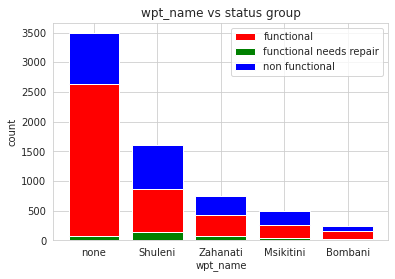

top 5 wpt names based on the frequency


In [72]:
#https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/
# importing package
import matplotlib.pyplot as plt

# create data
x = test6[0:5].wpt_name	
y1 =test6[0:5].functional
y2 =test6[0:5]['functional needs repair']		
y3 =test6[0:5]['non functional']		
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, color='g')
plt.bar(x, y3, bottom=y1, color='b')
plt.legend(labels=['functional','functional needs repair','non functional'])

plt.xlabel('wpt_name')
plt.ylabel('count')

plt.title('wpt_name vs status group')
plt.show()

print('top 5 wpt names based on the frequency')


Most of the data having none values followed by shuleni are the top water point names contributing the data 

one important aspect of this plot is none data having high % of functional so in future it might be useful in predicting the class label

# 1.9 num_private(97 % 0 values)

In [73]:
z=sum(pd.isnull(df.num_private))
print('number of null values',z)

number of null values 0


In [74]:
df.num_private.value_counts()

0       58643
6          81
1          73
5          46
8          46
        ...  
42          1
23          1
136         1
698         1
1402        1
Name: num_private, Length: 65, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (

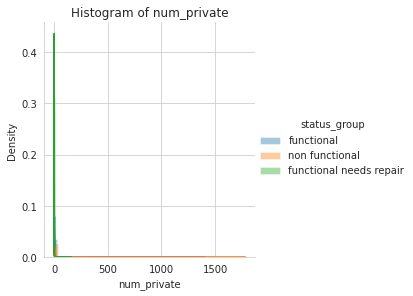

from the below plot its hard to differentiate the class label w.r.t to num_private


In [75]:
sns.FacetGrid(df, hue='status_group', size=4) \
   .map(sns.distplot, 'num_private') \
   .add_legend();
plt.title('Histogram of num_private')
plt.show();
print('from the below plot its hard to differentiate the class label w.r.t to num_private')

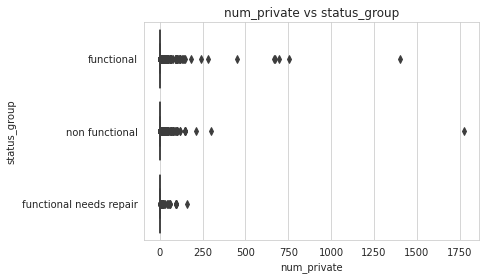

*************
it does not make any sense


In [76]:
plt.title('num_private vs status_group')
sns.boxplot(data=df, x='num_private', y='status_group')
plt.show()

print('*************')
print('it does not make any sense')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 5 for `bw_method`, but please see the docs for the new parameters and update your code.



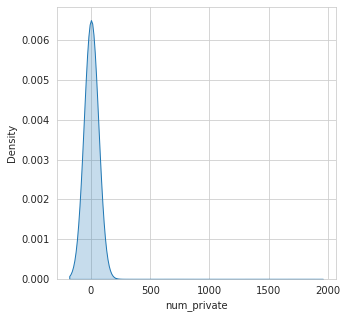

In [77]:
#https://stackoverflow.com/questions/71296986/how-to-draw-the-probability-density-function-pdf-plot-in-python

import seaborn as sns
plt.figure(figsize = (5,5))
sns.kdeplot(df["num_private"] , bw = 5 , fill = True)
plt.show()

97% values of this feature having 0 values hence it does not useful in predicting the class label hence it is recommended to delete this feature

# 1.10 basin

basin - Geographic water basin

In [78]:
df.basin

0                     Lake Nyasa
1                  Lake Victoria
2                        Pangani
3        Ruvuma / Southern Coast
4                  Lake Victoria
                  ...           
59395                    Pangani
59396                     Rufiji
59397                     Rufiji
59398                     Rufiji
59399                Wami / Ruvu
Name: basin, Length: 59400, dtype: object

In [79]:
z=sum(pd.isnull(df.basin))
print('number of null values',z)

number of null values 0


In [80]:
df.basin.value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [81]:
test5

status_group       functional  functional needs repair  non functional
wpt_name                                                              
24                        0.0                      0.0             1.0
A Kulwa                   0.0                      0.0             1.0
A Saidi                   1.0                      0.0             0.0
Abass                     1.0                      0.0             0.0
Abbas                     1.0                      0.0             0.0
...                       ...                      ...             ...
Zungu                     1.0                      0.0             0.0
Zunguni                   0.0                      0.0             1.0
Zunzuli A Shuleni         0.0                      0.0             1.0
Zuwena Kindo              0.0                      0.0             1.0
none                   2630.0                     76.0           857.0

[37400 rows x 3 columns]

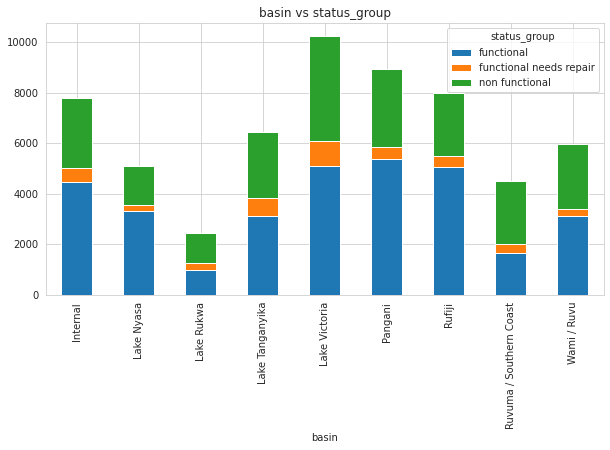

In [82]:
#https://stackoverflow.com/questions/23415500/pandas-plotting-a-stacked-bar-chart
test5 = df.groupby(['basin', 'status_group'])['status_group'].count().unstack('status_group').fillna(0)


test5[0:].plot(kind='bar', stacked=True,figsize=(10, 5))
plt.title('basin vs status_group')
plt.show()

In [83]:
df2 = df[['basin', 'status_group']]
df2 = df2.groupby([df2['basin'], df2['status_group']])['status_group'].count().unstack('status_group').fillna(0)
df2 = (df2.div(df2.sum(axis=1), axis=0) * 100).sort_values(by=['basin'], ascending=False)

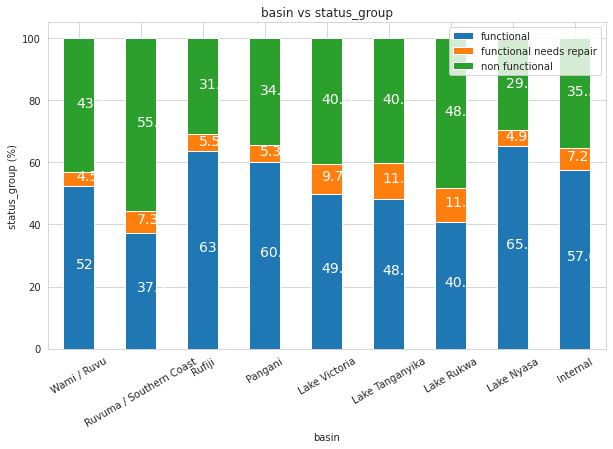

In [84]:
plot_stacked_bars(df2, 'basin vs status_group', rot_=30)

Lake Nyasa have the highest % of functional Pumps and Lake RUkwa  have highest number of non functional pumps.

In [85]:
#https://stackoverflow.com/questions/23415500/pandas-plotting-a-stacked-bar-chart
test5 = df.groupby(['basin', 'status_group'])['basin'].count().unstack('status_group').fillna(0)

test6=test5.reset_index().sort_values(by=['functional',], ascending=False)
test6


status_group                    basin  functional  functional needs repair  \
5                             Pangani        5372                      477   
4                       Lake Victoria        5100                      989   
6                              Rufiji        5068                      437   
0                            Internal        4482                      557   
1                          Lake Nyasa        3324                      250   
8                         Wami / Ruvu        3136                      269   
3                     Lake Tanganyika        3107                      742   
7             Ruvuma / Southern Coast        1670                      326   
2                          Lake Rukwa        1000                      270   

status_group  non functional  
5                       3091  
4                       4159  
6                       2471  
0                       2746  
1                       1511  
8                       2582  
3                       2583  
7                       2497  
2                       1184

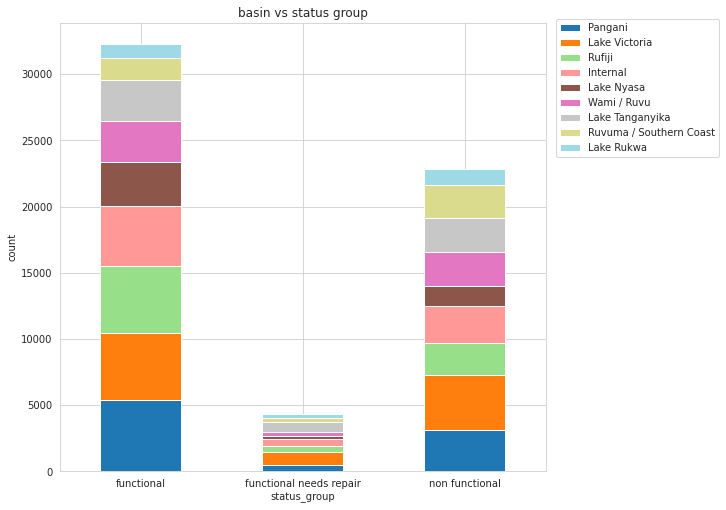

In [86]:
#https://stackoverflow.com/questions/23415500/pandas-plotting-a-stacked-bar-chart
test5 = df.groupby(['basin', 'status_group'])['basin'].count().unstack('status_group').fillna(0)

test6=test5.reset_index().sort_values(by=['functional',], ascending=False)
test6
#http://seaborn.pydata.org/tutorial/categorical.html?highlight=bar%20plot
import matplotlib.pyplot as plt
import pandas as pd

df1 = test6

ax = df1[:10].set_index('basin').T.plot.bar(stacked=True, rot=0, cmap='tab20', figsize=(10, 7))
ax.legend(bbox_to_anchor=(1.01, 1.02), loc='upper left')
plt.tight_layout()
plt.ylabel('count')
plt.title('basin vs status group')
plt.show()

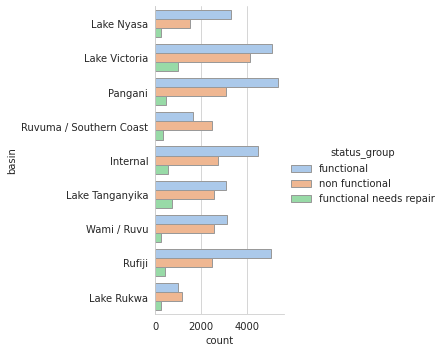

In [87]:
sns.catplot(
    data=df, y="basin", hue="status_group", kind="count",
    palette="pastel", edgecolor=".6",
)

Most functional and non functional pumps are in the basin of pangani and Ruvuma basin.hence it might be useful in predicting the class label

#1.11 subvillage

In [88]:
df.subvillage.value_counts()

Madukani        508
Shuleni         506
Majengo         502
Kati            373
Mtakuja         262
               ... 
Kipompo           1
Chanyamilima      1
Ikalime           1
Kemagaka          1
Kikatanyemba      1
Name: subvillage, Length: 19287, dtype: int64

In [89]:
z=sum(pd.isnull(df.subvillage))
print('number of null values',z)

number of null values 371


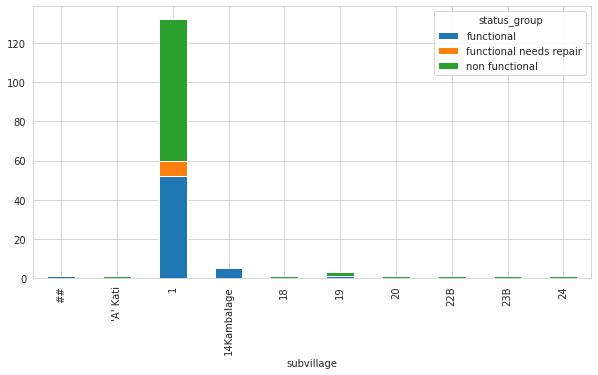

In [90]:
#https://stackoverflow.com/questions/23415500/pandas-plotting-a-stacked-bar-chart
test5 = df.groupby(['subvillage', 'status_group'])['subvillage'].count().unstack('status_group')


test5[0:10].plot(kind='bar', stacked=True,figsize=(10, 5))

In [91]:
df2 = df[['subvillage', 'status_group']]
df2 = df2.groupby([df2['subvillage'], df2['status_group']])['status_group'].count().unstack('status_group').fillna(0)
df2 = (df2.div(df2.sum(axis=1), axis=0) * 100).sort_values(by=['subvillage'], ascending=False)

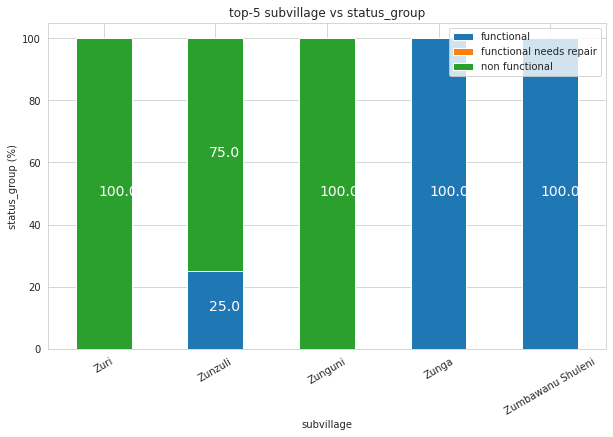

#top 5 subvillage 


In [92]:
plot_stacked_bars(df2[:5], 'top-5 subvillage vs status_group', rot_=30)
print('#top 5 subvillage ')

Top 5 sub villages shows in the plot which are useful for % classification of class labels

# 1.12  region

In [93]:
df.region.value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [94]:
z=sum(pd.isnull(df.region))
print('number of null values',z)

number of null values 0


In [95]:
df2 = df[['region', 'status_group']]
df2 = df2.groupby([df2['region'], df2['status_group']])['status_group'].count().unstack('status_group').fillna(0)
df2 = (df2.div(df2.sum(axis=1), axis=0) * 100).sort_values(by=['region'], ascending=False)

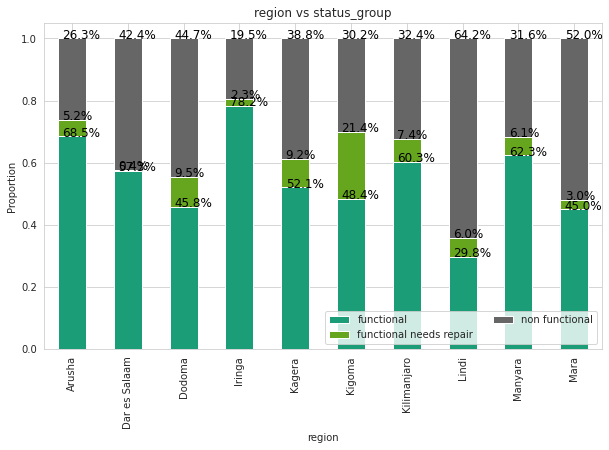

#top 10 region 


In [96]:
new_stack_bar('region')
print('#top 10 region ')

Top 10 sub region  shows in the plot which are useful for % classification of class labels

#1.13  region_code

In [97]:
df.region_code

0        11
1        20
2        21
3        90
4        18
         ..
59395     3
59396    11
59397    12
59398     1
59399     5
Name: region_code, Length: 59400, dtype: int64

In [98]:
df.region_code.value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [99]:
z=sum(pd.isnull(df.region_code))
print('number of null values',z)

number of null values 0


In [100]:
df2 = df[['region_code', 'status_group']]
df2 = df2.groupby([df2['region_code'], df2['status_group']])['status_group'].count().unstack('status_group').fillna(0)
df2 = (df2.div(df2.sum(axis=1), axis=0) * 100).sort_values(by=['functional'], ascending=False)

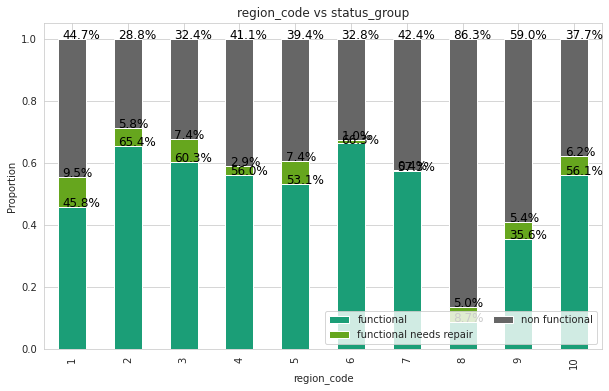

#top 10 region 


In [101]:
new_stack_bar('region_code')
print('#top 10 region ')

top 10 region_code shown in the plot which have high number of functional pumps

#1.14  district_code

In [102]:
df.district_code

0         5
1         2
2         4
3        63
4         1
         ..
59395     5
59396     4
59397     7
59398     4
59399     2
Name: district_code, Length: 59400, dtype: int64

In [103]:
df.district_code.value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [104]:
z=sum(pd.isnull(df.district_code))
print('number of null values',z)

number of null values 0


In [105]:
df2 = df[['district_code', 'status_group']]
df2 = df2.groupby([df2['district_code'], df2['status_group']])['status_group'].count().unstack('status_group').fillna(0)
df2 = (df2.div(df2.sum(axis=1), axis=0) * 100).sort_values(by=['functional'], ascending=False)

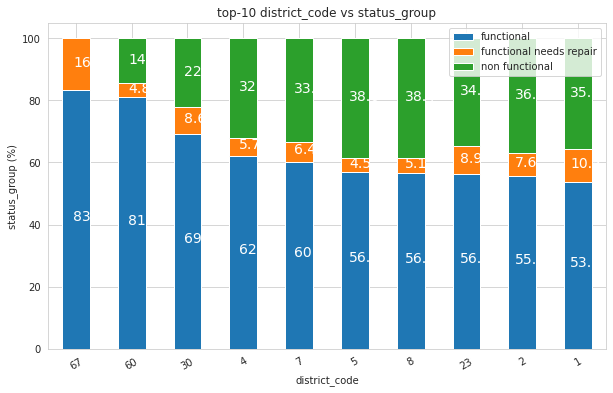

#top 10 region_code 


In [106]:
plot_stacked_bars(df2[:10], 'top-10 district_code vs status_group', rot_=30)
print('#top 10 region_code ')

top 10 district_code shown in the plot which have high number of functional pumps

#1.15 lga - Geographic location

In [107]:
df.lga

0                Ludewa
1             Serengeti
2             Simanjiro
3              Nanyumbu
4               Karagwe
              ...      
59395               Hai
59396            Njombe
59397           Mbarali
59398          Chamwino
59399    Morogoro Rural
Name: lga, Length: 59400, dtype: object

In [108]:
df.lga.value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [109]:
z=sum(pd.isnull(df.lga))
print('number of null values',z)

number of null values 0


In [110]:
df2 = df[['lga', 'status_group']]
df2 = df2.groupby([df2['lga'], df2['status_group']])['status_group'].count().unstack('status_group').fillna(0)
df2 = (df2.div(df2.sum(axis=1), axis=0) * 100).sort_values(by=['functional'], ascending=False)

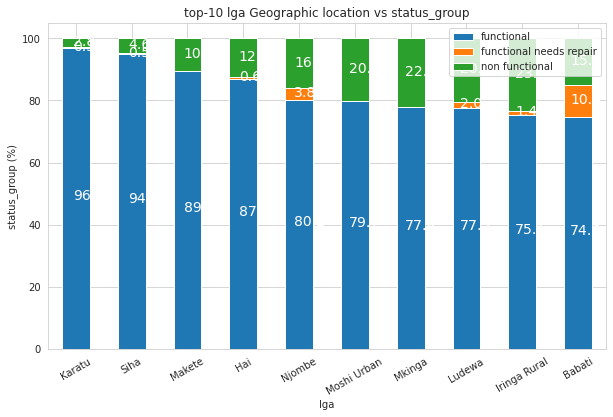

#top 10 lga Geographic location 


In [111]:
plot_stacked_bars(df2[:10], 'top-10 lga Geographic location vs status_group', rot_=30)
print('#top 10 lga Geographic location ')

Karatu lga has the top most feature having high % of functional pumps followed by siha.hence this feature might be useful in predicting the class label

#1.16  ward

In [112]:
df.ward.value_counts()

Igosi              307
Imalinyi           252
Siha Kati          232
Mdandu             231
Nduruma            217
                  ... 
Uchindile            1
Thawi                1
Uwanja wa Ndege      1
Izia                 1
Kinungu              1
Name: ward, Length: 2092, dtype: int64

In [113]:
z=sum(pd.isnull(df.ward))
print('number of null values',z)

number of null values 0


In [114]:
df2 = df[['ward', 'status_group']]
df2 = df2.groupby([df2['ward'], df2['status_group']])['status_group'].count().unstack('status_group').fillna(0)
df2 = (df2.div(df2.sum(axis=1), axis=0) * 100).sort_values(by=['functional'], ascending=False)

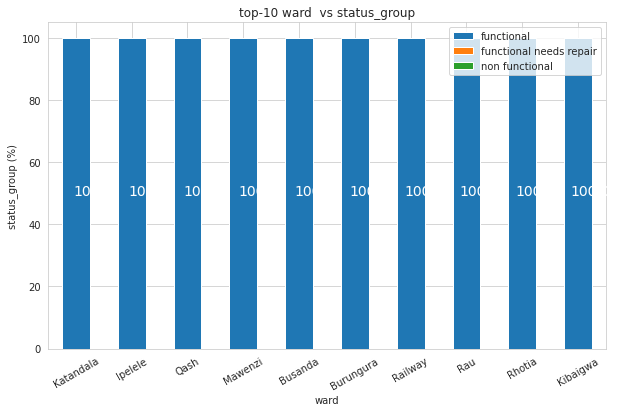

#top 10 ward 


In [115]:
plot_stacked_bars(df2[:10], 'top-10 ward  vs status_group', rot_=30)
print('#top 10 ward ')

top 10 wards having 100 % of functional.hence this feature might be useful in predicting the class label

#1.17  population

In [116]:
df.population.value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
6330        1
5030        1
656         1
948         1
788         1
Name: population, Length: 1049, dtype: int64

In [117]:
z=sum(pd.isnull(df.population))
print('number of null values',z)

number of null values 0


In [118]:
df.population.describe()

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64

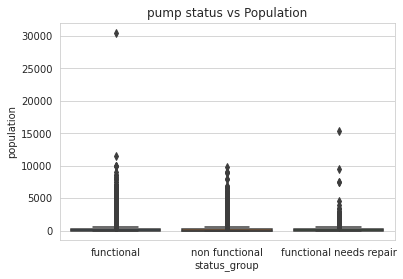

In [119]:
#https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/
# Draw a vertical boxplot grouped
# by a categorical variable:
import seaborn as sns
sns.set_style("whitegrid")

sns.boxplot(x = df['status_group'], y = df['population'], data = df)
plt.title('pump status vs Population')
plt.show()



Box plot does not make any sense

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (

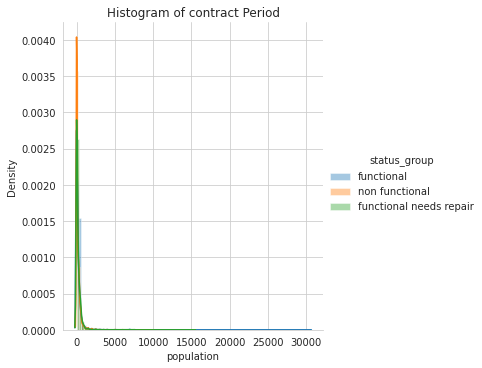

In [120]:
sns.FacetGrid(df, hue='status_group', size=5) \
   .map(sns.distplot, 'population') \
   .add_legend();
plt.title('Histogram of contract Period')
plt.show();

From the below plot if the population >5000 then we can clearly says pumps are functional
From the below plot if the population <5000 then class labels are overlapping
from the plot population is useful in seperating the class label 


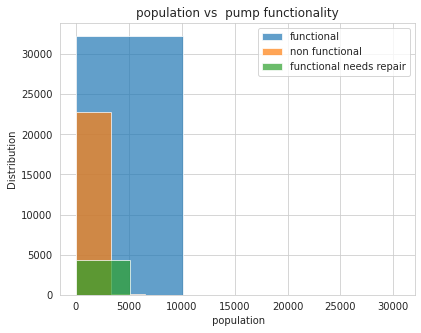

In [121]:
#https://datascience.stackexchange.com/questions/31752/plot-show-relationship-between-independent-variable-and-dependent-variablebinar
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(df['population'][df['status_group'] == 'functional'], bins=3, alpha = 0.7, label = 'functional')
plt.hist(df['population'][df['status_group'] == 'non functional'], bins=3, alpha = 0.7, label = 'non functional')
plt.hist(df['population'][df['status_group'] == 'functional needs repair'], bins=3, alpha = 0.7, label = 'functional needs repair')

plt.title('population vs  pump functionality')
plt.ylabel('Distribution')
plt.xlabel(' population')
plt.legend()

print('From the below plot if the population >5000 then we can clearly says pumps are functional')
print('From the below plot if the population <5000 then class labels are overlapping')
print('from the plot population is useful in seperating the class label ')
plt.show()

From the below plot if the population >5000 then we can clearly says pumps are functional.Hence it will be might useful in predicting the class label

#1.18  public_meeting

In [122]:
df.public_meeting.value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [123]:
z=sum(pd.isnull(df.public_meeting))
print('number of null values',z)

number of null values 3334


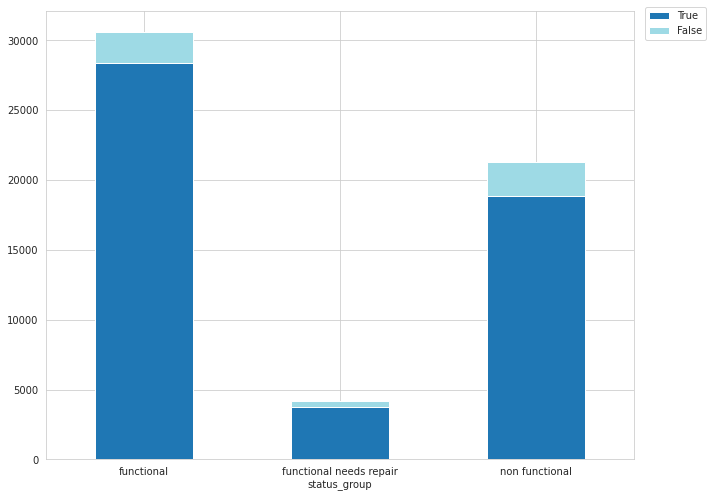

In [124]:
#https://stackoverflow.com/questions/23415500/pandas-plotting-a-stacked-bar-chart
test5 = df.groupby(['public_meeting', 'status_group'])['public_meeting'].count().unstack('status_group').fillna(0)

test6=test5.reset_index().sort_values(by=['public_meeting',], ascending=False)
test6
#http://seaborn.pydata.org/tutorial/categorical.html?highlight=bar%20plot
import matplotlib.pyplot as plt
import pandas as pd

df1 = test6

ax = df1[:10].set_index('public_meeting').T.plot.bar(stacked=True, rot=0, cmap='tab20', figsize=(10, 7))
ax.legend(bbox_to_anchor=(1.01, 1.02), loc='upper left')
plt.tight_layout()
plt.show()

Most of this feature having True labels hence missing values can be replace by mode of the fetaure

In [125]:
df2 = df[['public_meeting', 'status_group']]
df2 = df2.groupby([df2['public_meeting'], df2['status_group']])['status_group'].count().unstack('status_group').fillna(0)
df2 = (df2.div(df2.sum(axis=1), axis=0) * 100).sort_values(by=['public_meeting'], ascending=False)

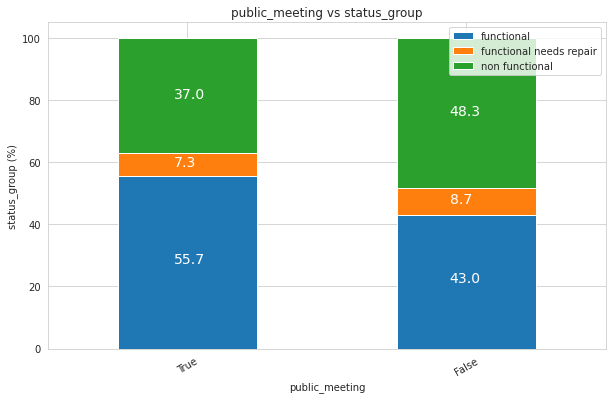

#public_meeting 


In [126]:
plot_stacked_bars(df2, 'public_meeting vs status_group', rot_=30)
print('#public_meeting ')

# 1.19  recorded_by

In [127]:
df.recorded_by.value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [128]:
z=sum(pd.isnull(df.recorded_by))
print('number of null values',z)

number of null values 0


below plot shows the histogram of recorded_by feature
this feature has not much variation hence it is advised to remove the feature


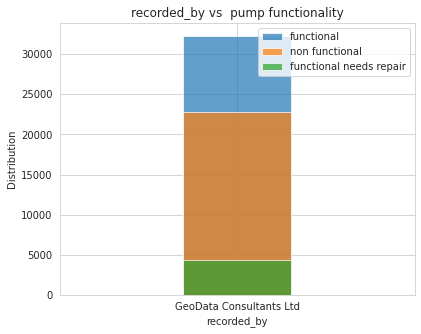

In [129]:
#https://datascience.stackexchange.com/questions/31752/plot-show-relationship-between-independent-variable-and-dependent-variablebinar
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.hist(df['recorded_by'][df['status_group'] == 'functional'], bins=3, alpha = 0.7, label = 'functional')
plt.hist(df['recorded_by'][df['status_group'] == 'non functional'], bins=3, alpha = 0.7, label = 'non functional')
plt.hist(df['recorded_by'][df['status_group'] == 'functional needs repair'], bins=3, alpha = 0.7, label = 'functional needs repair')

plt.title('recorded_by vs  pump functionality')
plt.ylabel('Distribution')
plt.xlabel('recorded_by')
plt.legend()

print('below plot shows the histogram of recorded_by feature')
print('this feature has not much variation hence it is advised to remove the feature')

plt.show()

Recorded_By feature having no variance hence it is not useful in predicting the class label

# 1.20  scheme_management

In [130]:
df.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [131]:
z=sum(pd.isnull(df.scheme_management))
print('number of null values',z)

number of null values 3877


In [132]:
df2 = df[['scheme_management', 'status_group']]
df2 = df2.groupby([df2['scheme_management'], df2['status_group']])['status_group'].count().unstack('status_group').fillna(0)
df2 = (df2.div(df2.sum(axis=1), axis=0) * 100).sort_values(by=['functional','non functional'], ascending=False)

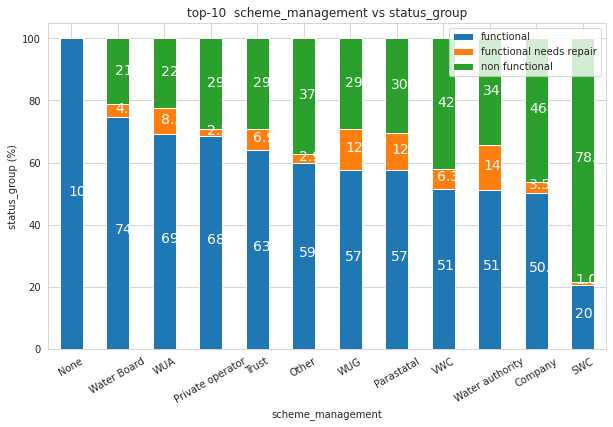

#top 10 scheme_management 


In [133]:
plot_stacked_bars(df2, 'top-10  scheme_management vs status_group', rot_=30)
print('#top 10 scheme_management ')

top 10 scheme_management shown according to their functionality in plot.Among them water Board have high number of functional pumps.

# 1.21  scheme_name 

In [134]:
z=sum(pd.isnull(df.scheme_name))
print('number of null values',z)

number of null values 28166


In [135]:
df.scheme_name.value_counts()


K                       682
None                    644
Borehole                546
Chalinze wate           405
M                       400
                       ... 
Mradi wa maji Vijini      1
Villagers                 1
Magundi water supply      1
Saadani Chumv             1
Mtawanya                  1
Name: scheme_name, Length: 2696, dtype: int64

In [136]:
df2 = df[['scheme_name', 'status_group']]
df2 = df2.groupby([df2['scheme_name'], df2['status_group']])['status_group'].count().unstack('status_group')
df2 = (df2.div(df2.sum(axis=1), axis=0) * 100).sort_values(by=['functional'], ascending=False)

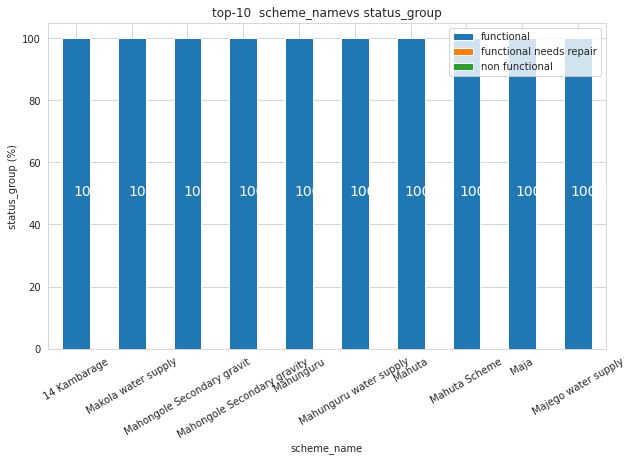

#top 10 scheme_name 


In [137]:
plot_stacked_bars(df2[:10], 'top-10  scheme_namevs status_group', rot_=30)
print('#top 10 scheme_name ')

top 10 scheme_name shown by functional pump wise in plot.All of the 10 having 100% pumps are functional

# automated func to stackedbar plot

In [138]:
def object_eda(feature,target,title):
  df2 = df[[feature,target]]
  df2 = df2.groupby([df2[feature], df2[target]])[target].count().unstack(target)
  df2 = (df2.div(df2.sum(axis=1), axis=0) * 100).sort_values(by=[feature], ascending=False)
  
  return plot_stacked_bars(df2[:10],title, rot_=30)

# 1.22  permit 

In [139]:
df.permit.value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [140]:
z=sum(pd.isnull(df.permit))
print('number of null values',z)

number of null values 3056


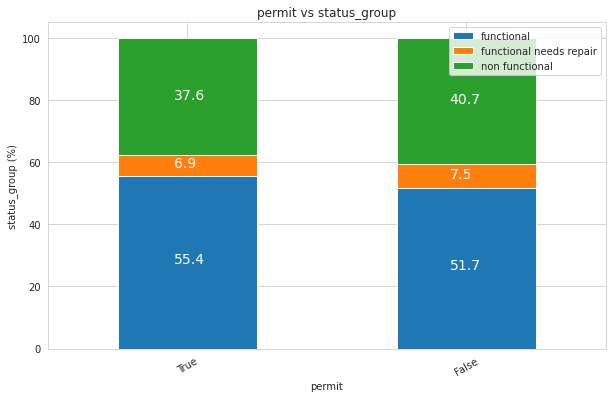

In [141]:
object_eda('permit','status_group','permit vs status_group')


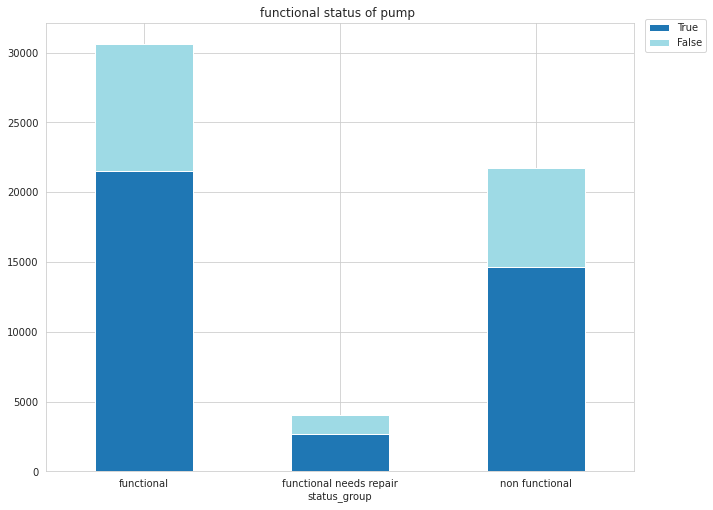

In [142]:
#https://stackoverflow.com/questions/23415500/pandas-plotting-a-stacked-bar-chart
test5 = df.groupby(['permit', 'status_group'])['permit'].count().unstack('status_group').fillna(0)

test6=test5.reset_index().sort_values(by=['permit',], ascending=False)
test6
#http://seaborn.pydata.org/tutorial/categorical.html?highlight=bar%20plot
import matplotlib.pyplot as plt
import pandas as pd

df1 = test6

ax = df1[:10].set_index('permit').T.plot.bar(stacked=True, rot=0, cmap='tab20', figsize=(10, 7))
ax.legend(bbox_to_anchor=(1.01, 1.02), loc='upper left')
plt.tight_layout()
plt.title('functional status of pump ')
plt.show()

Most of the values are True labels hence it is advised to replace null values with mode of data

Both Public meeting and Permit having same variables hence it recommended to remove one fearure in feature engineering 

# 1.23  construction_year

In [143]:
sum(pd.isnull(df.construction_year))

0

In [144]:
#filling the o values with median year 
df.construction_year=df.construction_year.replace(0,df.construction_year.median())

In [145]:
df.construction_year.value_counts()


1986    21143
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1996      811
1980      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

Text(0.5, 1.0, 'pdf of status_group')

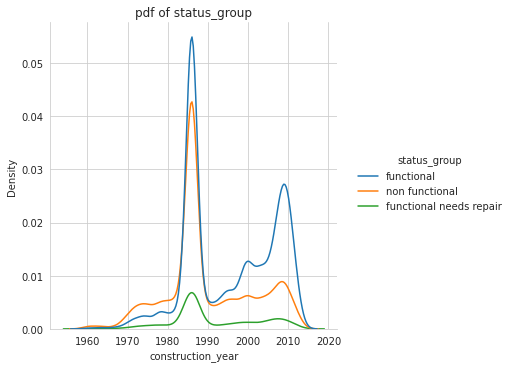

In [146]:
sns.displot(data=df, x="construction_year", hue="status_group", kind="kde")
plt.title('pdf of status_group')

Its hard to differentiate the class labels 

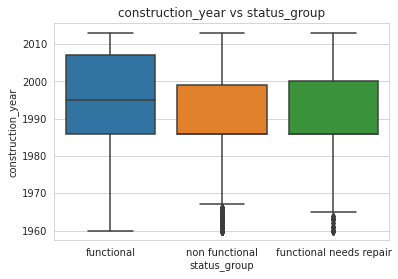

box plot shows that if year>1998 then we can clearly says that status are functional 


In [147]:
#https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/
# Draw a vertical boxplot grouped
# by a categorical variable:
import seaborn as sns
sns.set_style("whitegrid")

sns.boxplot(x = df['status_group'], y = df['construction_year'], data = df)
plt.title('construction_year vs status_group')
plt.show()
print('box plot shows that if year>1998 then we can clearly says that status are functional ')

box plot shows that if year>1998 then we can clearly says that status are functional.Hence it might be useful in predicting the class label

# 1.24  extraction_type

In [148]:
df.extraction_type.value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [149]:
sum(pd.isnull(df.extraction_type))

0

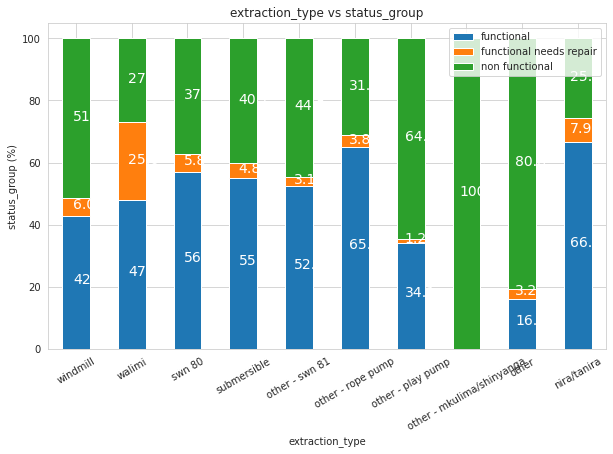

In [150]:
object_eda('extraction_type','status_group','extraction_type vs status_group')

# 1.25  extraction_type_group

In [151]:
def object_eda(feature,target,title):
  df2 = df[[feature,target]]
  df2 = df2.groupby([df2[feature], df2[target]])[target].count().unstack(target)
  df2 = (df2.div(df2.sum(axis=1), axis=0) * 100).sort_values(by=[feature], ascending=False)
  
  return plot_stacked_bars(df2[:10],title, rot_=30)

# information

In [152]:
def information(feat):
  z=df[feat].value_counts()
  n=sum(pd.isnull(df[feat]))

  print('value_counts')
  print(z)
  print('****************')
  return ('null_count',n)

In [153]:
information('extraction_type_group')

value_counts
gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64
****************


('null_count', 0)

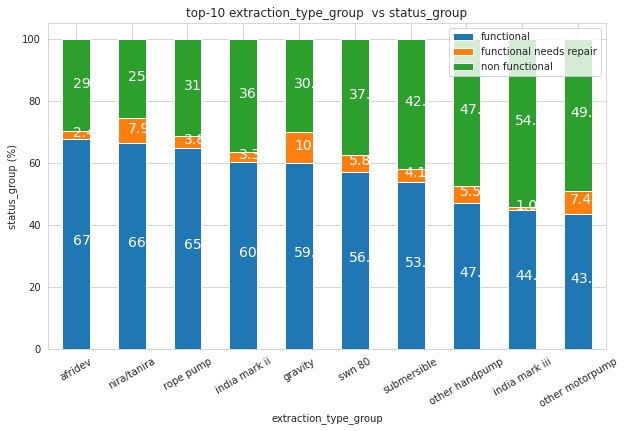

#top 10 extraction_type_group


In [154]:
df2 = df[['extraction_type_group', 'status_group']]
df2 = df2.groupby([df2['extraction_type_group'], df2['status_group']])['status_group'].count().unstack('status_group').fillna(0)
df2 = (df2.div(df2.sum(axis=1), axis=0) * 100).sort_values(by=['functional'], ascending=False)
plot_stacked_bars(df2[:10], 'top-10 extraction_type_group  vs status_group', rot_=30)
print('#top 10 extraction_type_group')

Top 10 extraction Type groups useful in ppumping the water

# 1.26  extraction_type_class  59400 non-null  object 


In [155]:
information('extraction_type_class')

value_counts
gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64
****************


('null_count', 0)

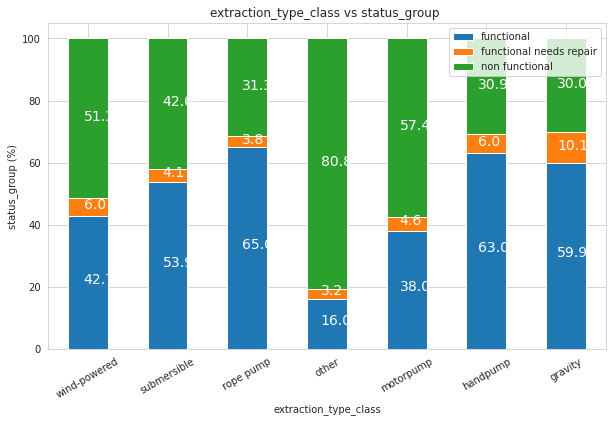

In [156]:
object_eda('extraction_type_class','status_group','extraction_type_class vs status_group ')

Top 10 extraction Type class useful in pumping the water from the above plot

# 1.27  management

In [157]:
information('management')

value_counts
vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64
****************


('null_count', 0)

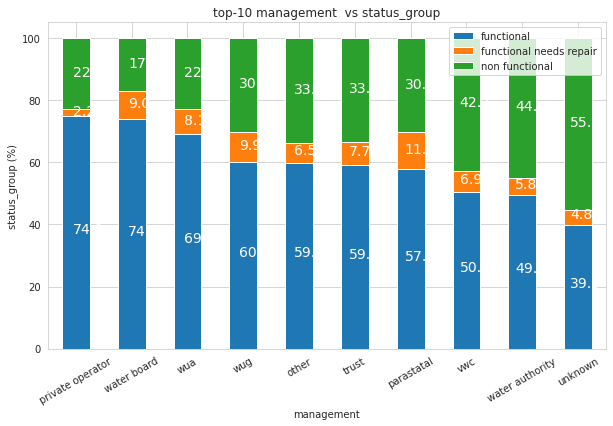

#top 10 management


In [158]:
df2 = df[['management', 'status_group']]
df2 = df2.groupby([df2['management'], df2['status_group']])['status_group'].count().unstack('status_group').fillna(0)
df2 = (df2.div(df2.sum(axis=1), axis=0) * 100).sort_values(by=['functional'], ascending=False)
plot_stacked_bars(df2[:10], 'top-10 management  vs status_group', rot_=30)
print('#top 10 management')

Top 10 management useful in pumping the water from the above plot.Among them Private operator and water board are highest contribution in functional pumps classification

# 1.28  management_group

In [159]:
information('management_group')

value_counts
user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64
****************


('null_count', 0)

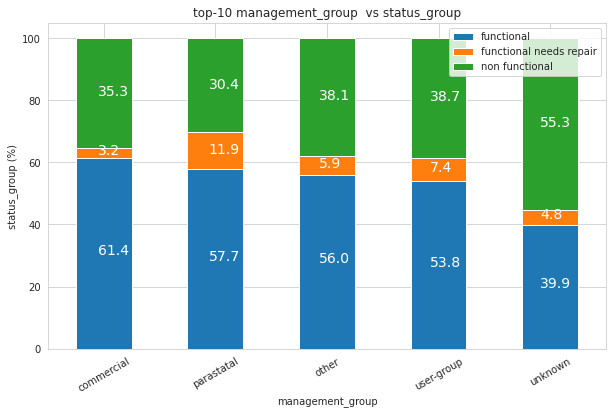

#top 10 management_group


In [160]:
df2 = df[['management_group', 'status_group']]
df2 = df2.groupby([df2['management_group'], df2['status_group']])['status_group'].count().unstack('status_group').fillna(0)
df2 = (df2.div(df2.sum(axis=1), axis=0) * 100).sort_values(by=['functional'], ascending=False)
plot_stacked_bars(df2[:10], 'top-10 management_group  vs status_group', rot_=30)
print('#top 10 management_group')

There are five management groups and functional pumps are high in commercial group

# 1.29  payment

In [161]:
information('payment')

value_counts
never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64
****************


('null_count', 0)

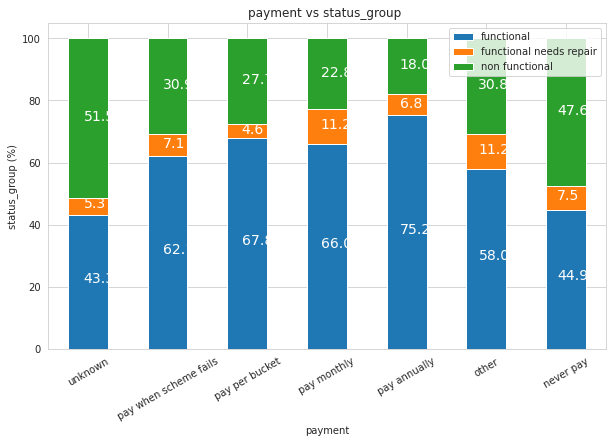

In [162]:
object_eda('payment','status_group','payment vs status_group ')

Highest number of pumps are functional when pay annually followed by pay monthly

# 1.30  payment_type

In [163]:
information('payment_type')

value_counts
never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64
****************


('null_count', 0)

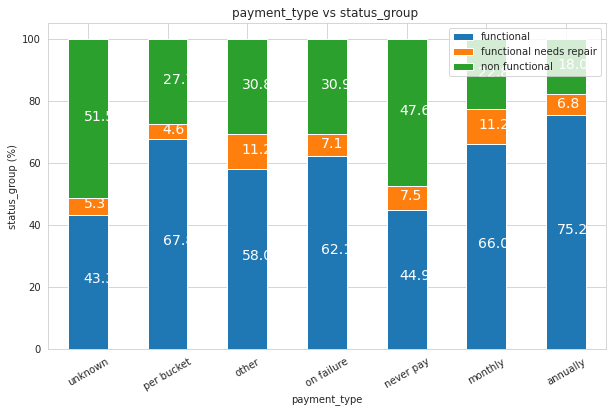

In [164]:
object_eda('payment_type','status_group','payment_type vs status_group ')

Both Payment and Payment type carries the similar information so its recommended to remove one feature among them

# 1.31  water_quality 

In [165]:
information('water_quality')

value_counts
soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64
****************


('null_count', 0)

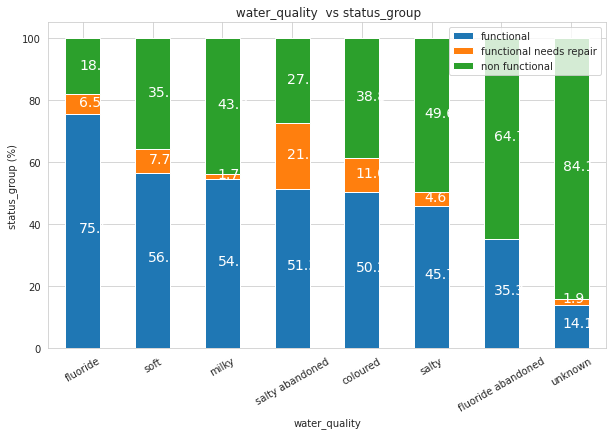

#top 10 water_quality


In [166]:
df2 = df[['water_quality', 'status_group']]
df2 = df2.groupby([df2['water_quality'], df2['status_group']])['status_group'].count().unstack('status_group').fillna(0)
df2 = (df2.div(df2.sum(axis=1), axis=0) * 100).sort_values(by=['functional'], ascending=False)
plot_stacked_bars(df2[:10], ' water_quality  vs status_group', rot_=30)
print('#top 10 water_quality')

water which having fluoride content having highest % of functional pumps and fluoride abandoned and unknown have highest chance of non functional pumps

#1.32  quality_group

In [167]:
information('quality_group')

value_counts
good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64
****************


('null_count', 0)

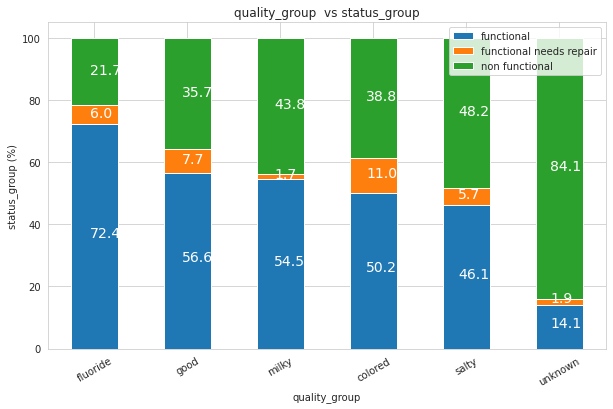

In [168]:
df2 = df[['quality_group', 'status_group']]
df2 = df2.groupby([df2['quality_group'], df2['status_group']])['status_group'].count().unstack('status_group').fillna(0)
df2 = (df2.div(df2.sum(axis=1), axis=0) * 100).sort_values(by=['functional'], ascending=False)
plot_stacked_bars(df2[:10], 'quality_group  vs status_group', rot_=30)


Both water quality and quality group having similar information hence its recommended to remove any one of the feature

# 1.33  quantity

In [169]:
information('quantity')

value_counts
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64
****************


('null_count', 0)

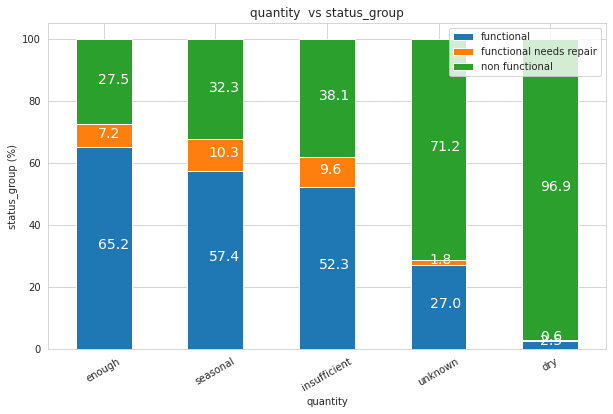

In [170]:
df2 = df[['quantity', 'status_group']]
df2 = df2.groupby([df2['quantity'], df2['status_group']])['status_group'].count().unstack('status_group').fillna(0)
df2 = (df2.div(df2.sum(axis=1), axis=0) * 100).sort_values(by=['functional'], ascending=False)
plot_stacked_bars(df2[:10], 'quantity  vs status_group', rot_=30)


96.9 % pumps are non functional if quantity is dry and if quantity is enough 65.22 pumps are functional.hence quantity is useful in predicting the class label 

# 1.34  quantity_group

In [171]:
information('quantity_group')

value_counts
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64
****************


('null_count', 0)

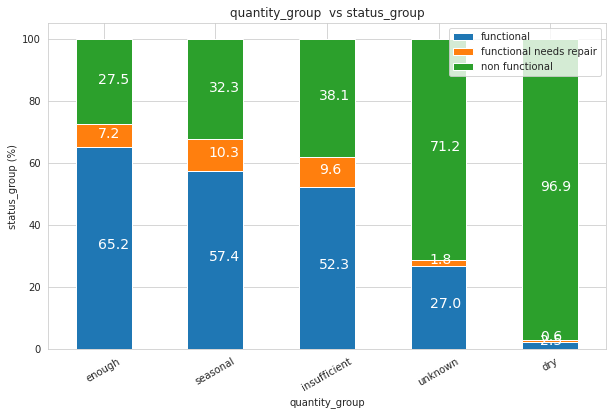

In [172]:
df2 = df[['quantity_group', 'status_group']]
df2 = df2.groupby([df2['quantity_group'], df2['status_group']])['status_group'].count().unstack('status_group').fillna(0)
df2 = (df2.div(df2.sum(axis=1), axis=0) * 100).sort_values(by=['functional'], ascending=False)
plot_stacked_bars(df2[:10], 'quantity_group  vs status_group', rot_=30)


Both  quantity and quantity group having similar information hence its recommended to remove any one of the feature

# 1.35  source

In [173]:
information('source')

value_counts
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64
****************


('null_count', 0)

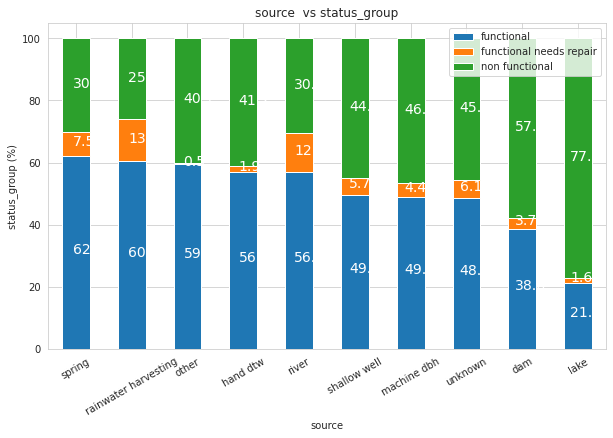

In [174]:
df2 = df[['source', 'status_group']]
df2 = df2.groupby([df2['source'], df2['status_group']])['status_group'].count().unstack('status_group').fillna(0)
df2 = (df2.div(df2.sum(axis=1), axis=0) * 100).sort_values(by=['functional'], ascending=False)
plot_stacked_bars(df2[:10], 'source  vs status_group', rot_=30)

77.3 % pumps are non functional if source is lake and if source is spring 62.22 pumps are functional.hence source is useful in predicting the class label

# 1.36  source_type

In [175]:
information('source_type')

value_counts
spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64
****************


('null_count', 0)

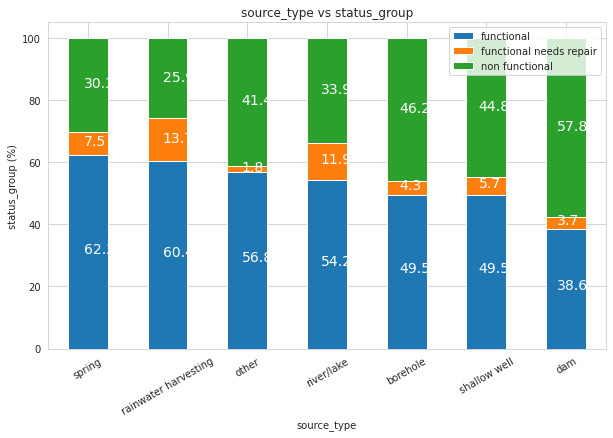

In [176]:
df2 = df[['source_type', 'status_group']]
df2 = df2.groupby([df2['source_type'], df2['status_group']])['status_group'].count().unstack('status_group').fillna(0)
df2 = (df2.div(df2.sum(axis=1), axis=0) * 100).sort_values(by=['functional'], ascending=False)
plot_stacked_bars(df2[:10], 'source_type vs status_group', rot_=30)

Both  source and source type having similar information hence its recommended to remove any one of the feature

# 1.37 source_type_class

In [177]:
information('source_class')

value_counts
groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64
****************


('null_count', 0)

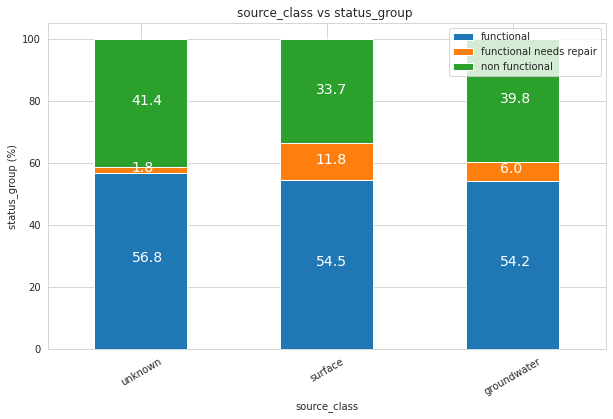

In [178]:
object_eda('source_class','status_group','source_class vs status_group ')

Both  source_class and quality group having similar information hence its recommended to remove any one of the feature

# 1.38  waterpoint_type        59400 non-null  object 
 

In [179]:
information('waterpoint_type')

value_counts
communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64
****************


('null_count', 0)

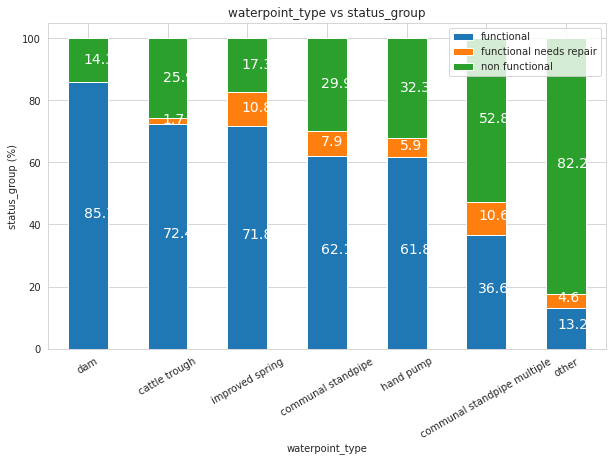

In [180]:
df2 = df[['waterpoint_type', 'status_group']]
df2 = df2.groupby([df2['waterpoint_type'], df2['status_group']])['status_group'].count().unstack('status_group').fillna(0)
df2 = (df2.div(df2.sum(axis=1), axis=0) * 100).sort_values(by=['functional'], ascending=False)
plot_stacked_bars(df2[:10], 'waterpoint_type vs status_group', rot_=30)

82.2% pumps are non functional if water point type is other and if water point type is dam 85 %pumps are functional.hence water point type is useful in predicting the class label

# 1.39  waterpoint_type_group  59400 non-null  object

In [181]:
information('waterpoint_type_group')

value_counts
communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64
****************


('null_count', 0)

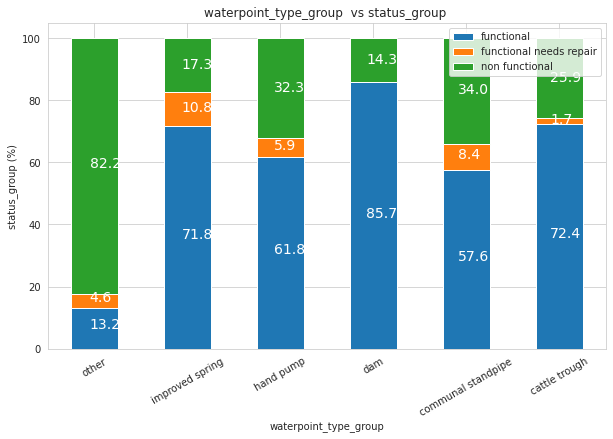

In [182]:
object_eda('waterpoint_type_group','status_group','waterpoint_type_group  vs status_group ')

Both waterpoint_type,waterpoint_type_group  having similar information hence its recommended to remove any one of the feature

# 1.40  status_group

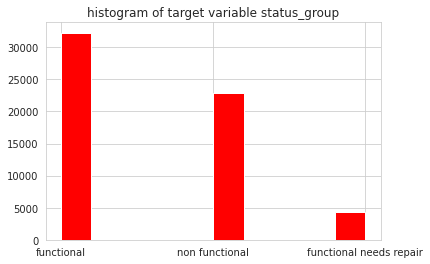

In [183]:
plt.title('histogram of target variable status_group')
plt.hist(df['status_group'], color = "r")
plt.show()

Target variable having class imbalance.majority of class belongs to functional and minority class belong to functional needs repair

# Multivariate analysis between target variable and numrical variables

In [184]:
#https://seaborn.pydata.org/generated/seaborn.pairplot.html
df_new=df[['amount_tsh','gps_height','longitude','latitude','district_code','region_code','status_group']]

Text(0.5, 0.98, 'pair plot between numerical variables vs status_group')

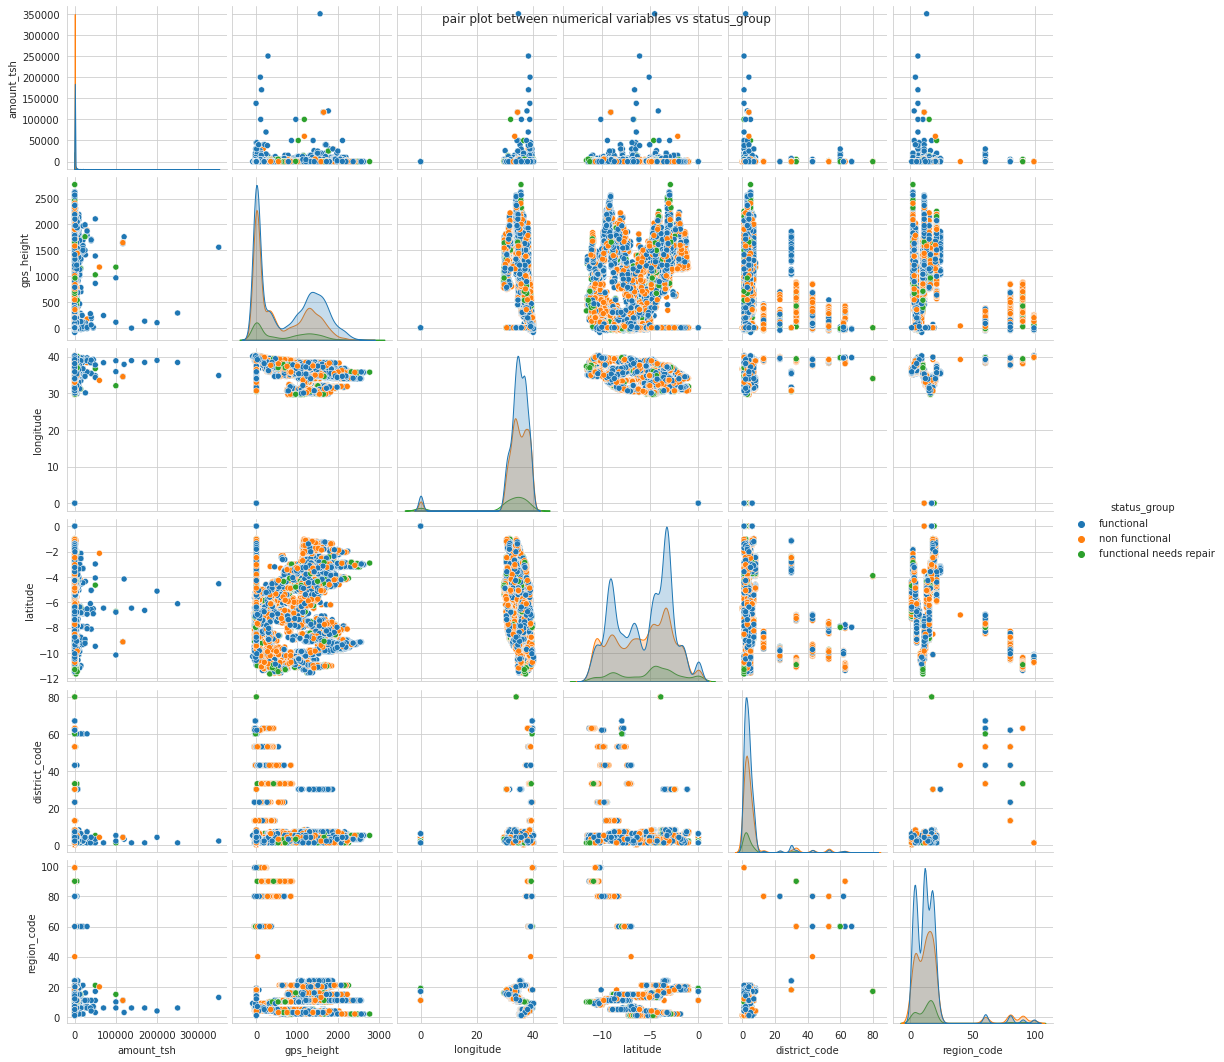

In [185]:
#plt.title('pairplot among numerical features vs status_group')
g=sns.pairplot(df_new, hue="status_group")
g.fig.suptitle("pair plot between numerical variables vs status_group")


if the latitude is with in range of -2 to -10 and amount_tsh are greater than 30000 then the pump functional will be classified as functional


if the longitude is with in range of 20 to 40 and amount_tsh are greater than 10000 then the pump functional will be classified as functional




In [186]:
df_new1=df[['district_code','region_code','status_group','population']]

Text(0.5, 0.98, 'pair plot between numerical variables vs status_group')

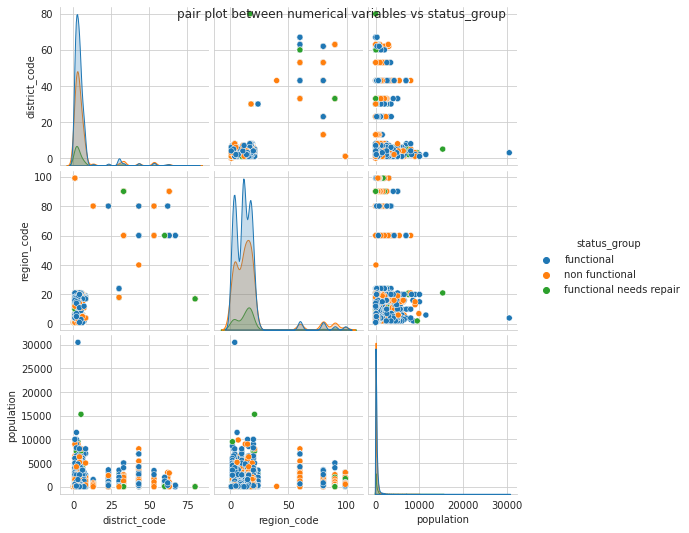

In [187]:
g=sns.pairplot(df_new1, hue="status_group")
g.fig.suptitle("pair plot between numerical variables vs status_group")

its hard to interpret the functional status of a pump based on the features which are highly overlapping w.r.t to class labels

#conclusions
1)Data contains 59400 rows and 41 columns

2)There are 11 numeric features out of them id is not a useful feature hence feature was removed

3)There are 29 categorical features out of them status_group is a class label which have three sub categories 

4)hence the problem is classified as multiclassification problem

#From PDF and CDF's:
1)it was identified that 70% of values belonging to  tsh features  are having 0 values,hence its recommended 
to fill the missing value with mean or median or you can remove the feature

2)from pdf of gps_height its hard to say whether feature is important or not
3) from cdf of num_private it was identified that most of the values are null hence its recommended to delete the feature

#From pairplots:
1)if the latitude is with in range of -2 to -10 and amount_tsh are greater than 30000 then the pump functional 
will be classified as functional

2)if the longitude is with in range of 20 to 40 and amount_tsh are greater than 10000 then the pump functional 
will be classified as functional

#From Box-plot:

These plots help us to find the percentile of each feature like inter-quantile-range(25%-75%)

box plot identifying that gps_height is useful in classification of pump functionality

box plot shows that if year>1998 then we can clearly says that status are functional.
Hence it might be useful in predicting the class label

#From Stacked Bar charts:
1)These plots are useful in finding the most frequent sub categories in percentage wise of each feature like top 10 funded agencies and top 10 installers etc.,

2)it is useful in identifying the some of features which having highest none values having high functional status. so that these might be replaced by mean,median or mode in future for predicting the class label


###By using above all plots it can be easily find the features which are most important in predicting  the class labels